<h1>Project goal: Customer segmentation- clustering</h1><br>

<h3><b>Hypothesis:</b> Different customer demographics and engagement levels influence purchasing behaviors and preferences across six main product categories: fish, meat, fruits, wines, gold, and sweets.</h3>

<b>Data set source:</b> [Customer Personality Analysis (kaggle.com)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

<b>Project Description:</b> This project uses a dataset with 29 columns and approximately 2,240 rows, containing demographic information about customers (such as age, education, marital status, etc.), engagement levels (including participation in various campaigns), and purchasing behavior (across six main product categories and different purchase channels). The primary goal is to segment customers into distinct groups using clustering techniques.

Specifically, I aim to identify patterns such as:

<ol> <li><b>Customer Demographics:</b> How factors like age, education, income, marital status, and the number of children at home relates to purchases in these six main product categories.</li> 
<li><b>Engagement Behavior:</b> How participation in promotional offers, along with the frequency and types of purchases across different channels (e.g., discount purchases, web purchases, catalog purchases, and store purchases), relates to purchases in these six main product categories.</li> </ol><br>

To achieve this, I will apply clustering algorithms, such as K-means or hierarchical clustering, to group customers based on similarities in their demographic and purchasing data. This analysis will provide insights into customer segments with similar behaviors, facilitating targeted marketing strategies tailored to each segment’s unique characteristics and preferences.

<br>(Try different clustering methods, do evaluation, maybe even try to make some predictions at the end of the project...)



<h2>Importing packages</h2>

In [205]:
#Importing the libraries
# data manipulation and analysis library, it makes possible to work win dataframe format
import pandas as pd

#library for numerical operations, it gives support for arrays, math functions...
import numpy as np

# statistical data visualization library, it makes possible to show advanced grafs
import seaborn as sns

# library for static, and visualizations in
import matplotlib.pyplot as plt

# LinearSegmentedColormap is a class that creates a color map from a list of colors, it is used to create custom color maps
from matplotlib.colors import LinearSegmentedColormap as lsc

#%pip install scikit-learn
#KMeans will be used to create the model for clustering
from sklearn.cluster import KMeans

#silhouette_score will be used to calculate the silhouette score for clustering
from sklearn.metrics import silhouette_score

#PCA will be used to reduce the dimensionality of the data
from sklearn.decomposition import PCA

#installing yellowbrick to use the KElbowVisualizer
#%pip install yellowbrick
#from yellowbrick.cluster import KElbowVisualizer

# Import MinMaxScaler from sk preprocessing
from sklearn.preprocessing import MinMaxScaler
#for scaling the data
from sklearn.preprocessing import StandardScaler

#gaussian mixture model will be used to create the model for clustering
from sklearn.mixture import GaussianMixture

#StandardScaler will be used to scale the data
from sklearn.preprocessing import StandardScaler

#will be used for DBSCAN clustering to calculate distances between points
from sklearn.neighbors import NearestNeighbors

#DBSCAN will be used to create the model for clustering
from sklearn.cluster import DBSCAN


<h2>Importing data set</h2>

In [206]:
#Importing the dataset
df = pd.read_csv("marketing_campaign.csv", sep='\t')

<h2>Step 1: Exploratory Data Analysis</h2>


In [207]:
#printing info about columns
#it shows column names, number of rows, data types and number of null values per column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [208]:
#describe gives insight about data frame as  min and max, middle, and quartile values per column...
print(df.describe(include='all'))

                  ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      R

In [209]:
#displaying first 5 rows using head method
#it is useful to see the data structure
df.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [210]:
#df.columns gives the column names
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [211]:
#i noticed that columns Z_CostContact and Z_Revenue have only one value, so they are not useful for the model
#printing unique values of columns and dropping them
print(df.Z_CostContact.unique())
print(df.Z_Revenue.unique())

df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

[3]
[11]


In [212]:
#counting null values in the dataframe
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


In [213]:
#replace null values in income with 0
df['Income'] = df['Income'].fillna(0)

In [214]:
#converting the column Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')


In [215]:
#some columns have names that are not clear, so i will rename them
#renaming columns
df.rename(columns={'Year_Birth': 'Year_of_birth'}, inplace=True)
df.rename(columns={'Recency': 'Last_purchase'}, inplace=True)
df.rename(columns={'MntWines': 'Amount_wines'}, inplace=True)
df.rename(columns={'MntFruits': 'Amount_fruits'}, inplace=True)
df.rename(columns={'MntMeatProducts': 'Amount_meat'}, inplace=True)
df.rename(columns={'MntFishProducts': 'Amount_fish'}, inplace=True)
df.rename(columns={'MntSweetProducts': 'Amount_sweets'}, inplace=True)
df.rename(columns={'MntGoldProds': 'Amount_gold'}, inplace=True)
df.rename(columns={'Kidhome': 'Kids_at_home'}, inplace=True)
df.rename(columns={'Teenhome': 'Teens_at_home'}, inplace=True)
df.rename(columns={'NumDealsPurchases': 'Discount_purchases'}, inplace=True)
df.rename(columns={'NumWebPurchases': 'Web_purchases'}, inplace=True)
df.rename(columns={'NumCatalogPurchases': 'Catalog_purchases'}, inplace=True)
df.rename(columns={'NumStorePurchases': 'Store_purchases'}, inplace=True)
df.rename(columns={'NumWebVisitsMonth': 'Website_visits'}, inplace=True)
df.rename(columns={'Dt_Customer': 'Enrollment_date'}, inplace=True)
df.rename(columns={'AcceptedCmp3': 'Offer_campain_3'}, inplace=True) 
df.rename(columns={'AcceptedCmp4': 'Offer_campain_4'}, inplace=True)
df.rename(columns={'AcceptedCmp5': 'Offer_campain_5'}, inplace=True)
df.rename(columns={'AcceptedCmp1': 'Offer_campain_1'}, inplace=True)
df.rename(columns={'AcceptedCmp2': 'Offer_campain_2'}, inplace=True)
df.rename(columns={'Response': 'Last_campain'}, inplace=True)

df.columns

Index(['ID', 'Year_of_birth', 'Education', 'Marital_Status', 'Income',
       'Kids_at_home', 'Teens_at_home', 'Enrollment_date', 'Last_purchase',
       'Amount_wines', 'Amount_fruits', 'Amount_meat', 'Amount_fish',
       'Amount_sweets', 'Amount_gold', 'Discount_purchases', 'Web_purchases',
       'Catalog_purchases', 'Store_purchases', 'Website_visits',
       'Offer_campain_3', 'Offer_campain_4', 'Offer_campain_5',
       'Offer_campain_1', 'Offer_campain_2', 'Complain', 'Last_campain'],
      dtype='object')

<h3>Listing variables based on their features</h3>
<b> Discrete Variables </b>

- Kids_at_home, Teens_at_home, Discount_purchases, Web_purchases, Catalog_purchases, Store_purchases, Website_visits

<b> Categorical Variables </b>
- Offer_campain_3, Offer_campain_4, Offer_campain_5, Offer_campain_1, Offer_campain_2, Last_campain, Complain, Education, Marital_Status

<b> Continuous Variables </b>
- Year_of_birth, Last_purchase, Income, Amount_wines, Amount_fruits, Amount_meat, Amount_fish, Amount_sweets, Amount_gold

<b> Date Variables </b>
- Enrollment_date

<h2>Presenting data on charts</h3>
It takes in count variable features

In [216]:
#some rows in the Marital_Status column have values that are not clear, probably they are mistakes. I counted them and decided to drop them as tat would not affect the model
print((df["Marital_Status"] == "Absurd").sum())
print((df["Marital_Status"] == "YOLO").sum())
print((df["Marital_Status"] == "Alone").sum())

df = df.drop(df[df['Marital_Status'] == "Absurd"].index)
df = df.drop(df[df['Marital_Status'] == "YOLO"].index)
df= df.replace('Alone', 'Single')
df= df.replace('Divorced', 'Single')
df= df.replace('Widow', 'Single')
df= df.replace('Together', 'In a relationship')

2
2
3


In [217]:
#some coulmns in eductaion have different values that mean the same, so i will replace them
df= df.replace('2n Cycle', 'Tertiary')
df= df.replace('Basic', 'Secondary')
df= df.replace('Graduation', 'Tertiary')
df= df.replace('Master', 'Tertiary')
df= df.replace('PhD', 'Doctoral Degree')

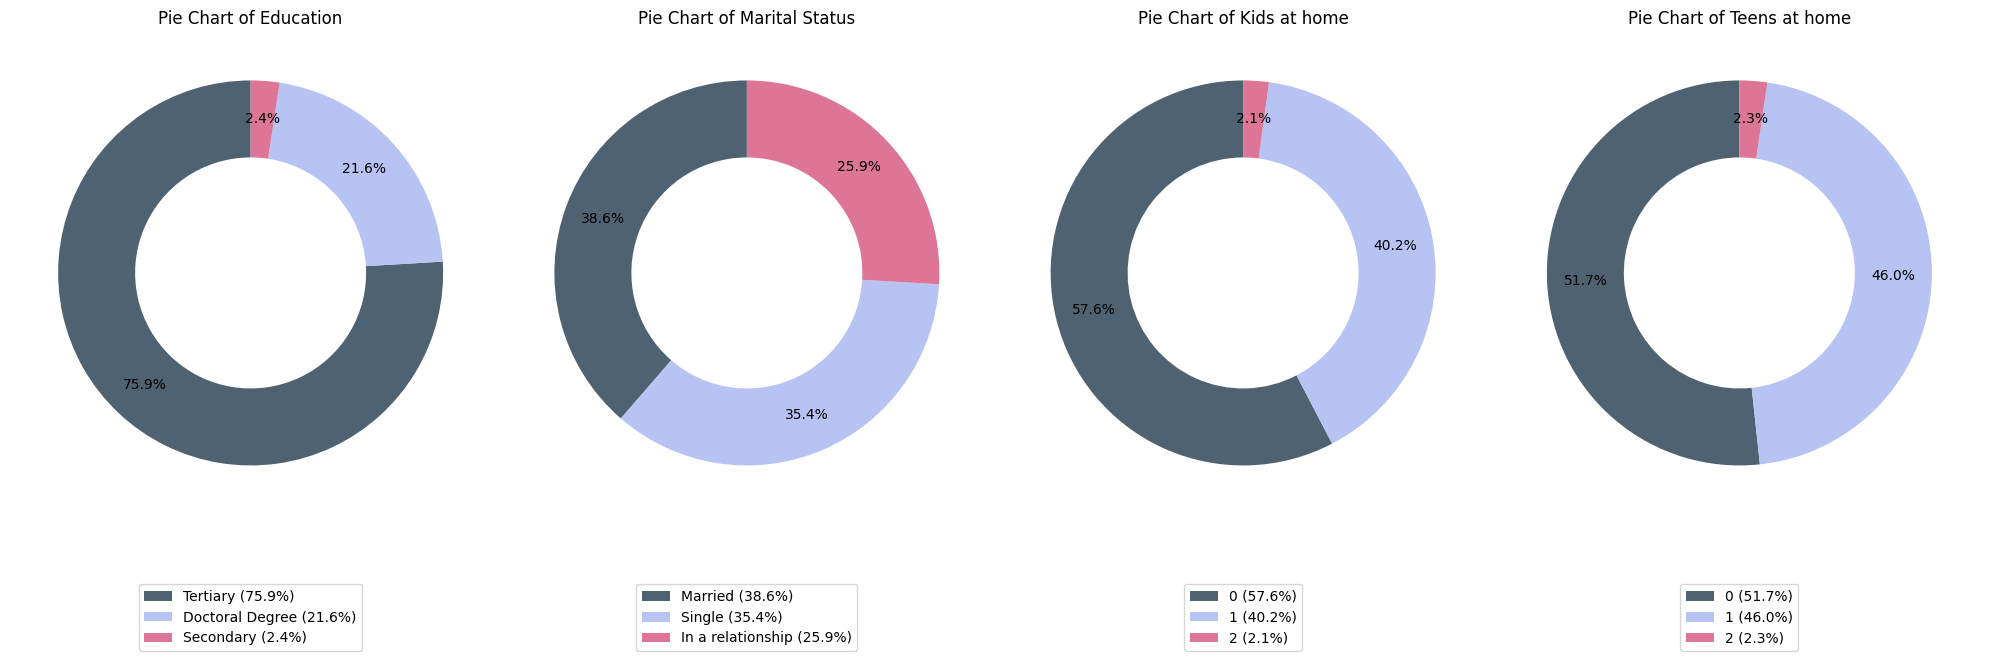

In [218]:
# Columns that will be used
columns = ["Education", "Marital_Status", "Kids_at_home", "Teens_at_home"]
# Colors for pie chart
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FFC857', '#119DA4', '#19647E', '#FF6F61', '#6A0572']

# Plotting pie charts, and flattening the axs array to iterate over it
fig, axs = plt.subplots(1, 4, figsize=(20, 7))
axs = axs.flatten()

# Iterating over columns and plotting pie charts
for i, column in enumerate(columns):
    ratings_count = df[column].value_counts(dropna=False).sort_values(ascending=False) # getting the count of each rating
    wedges, texts, autotexts = axs[i].pie( # plotting the pie chart
        ratings_count.values, # values
        colors=colors[:len(ratings_count)], # colors
        autopct='%1.1f%%', # percentage format
        startangle=90, # start angle of the pie
        wedgeprops=dict(width=0.4), # width of the pie
        pctdistance=0.8, # distance from center
    )
    axs[i].legend( # adding legend
        wedges,  
        [f'{label} ({pct:.1f}%)' for label, pct in zip(ratings_count.index, 100 * ratings_count.values / ratings_count.values.sum())], # legend labels
        loc='lower center', # location of the legend
        bbox_to_anchor=(0.5, -0.3) # position of the legend
    )
    axs[i].set_title(f"Pie Chart of {column.replace('_', ' ')}", fontsize=12) # setting the title of the plot

plt.tight_layout() # adjusting the layout, so the plots don't overlap
plt.show()

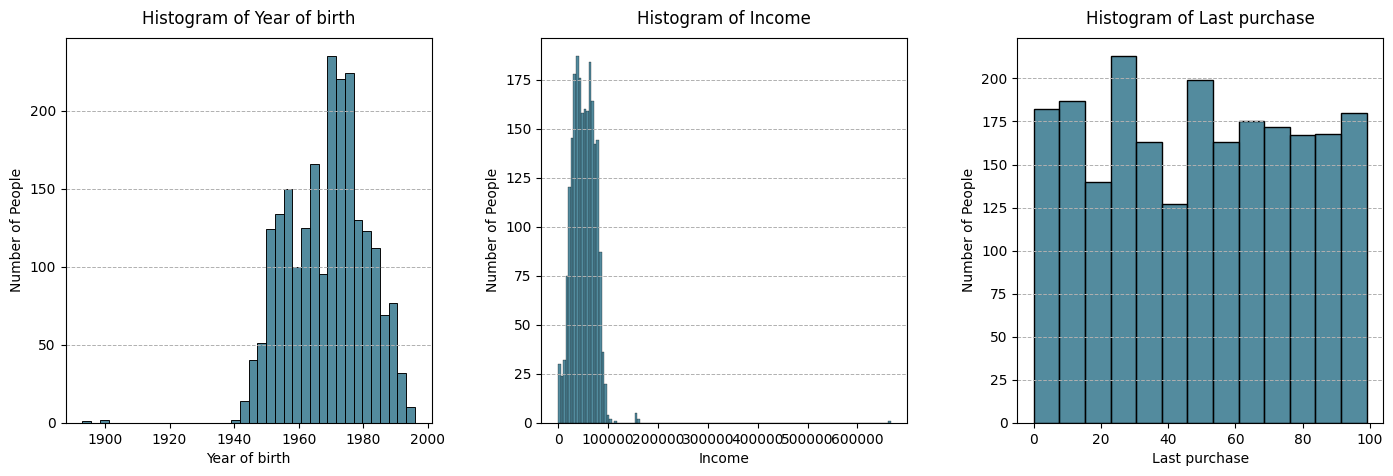

In [219]:
#list of columns that will be used in the plot
columns = ["Year_of_birth", "Income", "Last_purchase"]

#plt.subplots() creates a plot with 3 subplots, 3 per row
#figyre is the container for the plot; axs is 1X1 array
figure, axs = plt.subplots(1, 3, figsize=(17, 5))
# flattens 2D array of axes objects into 1D array
axs = axs.flatten()

#iterates through names of the columns from df that are saved in a list columns
#sns.histplot(df[column], ax=axs[i]) plots a histrogram of the specified column on the corresponding subplot axis
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=axs[i], color='#19647E')
    axs[i].set_title("Histogram of " + column.replace("_", " "), pad=10)
    axs[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
    axs[i].set_ylabel('Number of People')
    axs[i].set_xlabel(column.replace("_", " "))

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [220]:
df = df.drop(df[df['Income'] > 150000].index) #drop the rows with income greater than 150000 as they are outliers
df = df.drop(df[df["Year_of_birth"] < 1940].index) #drop the rows with year of birth less than 1940 as they are outliers

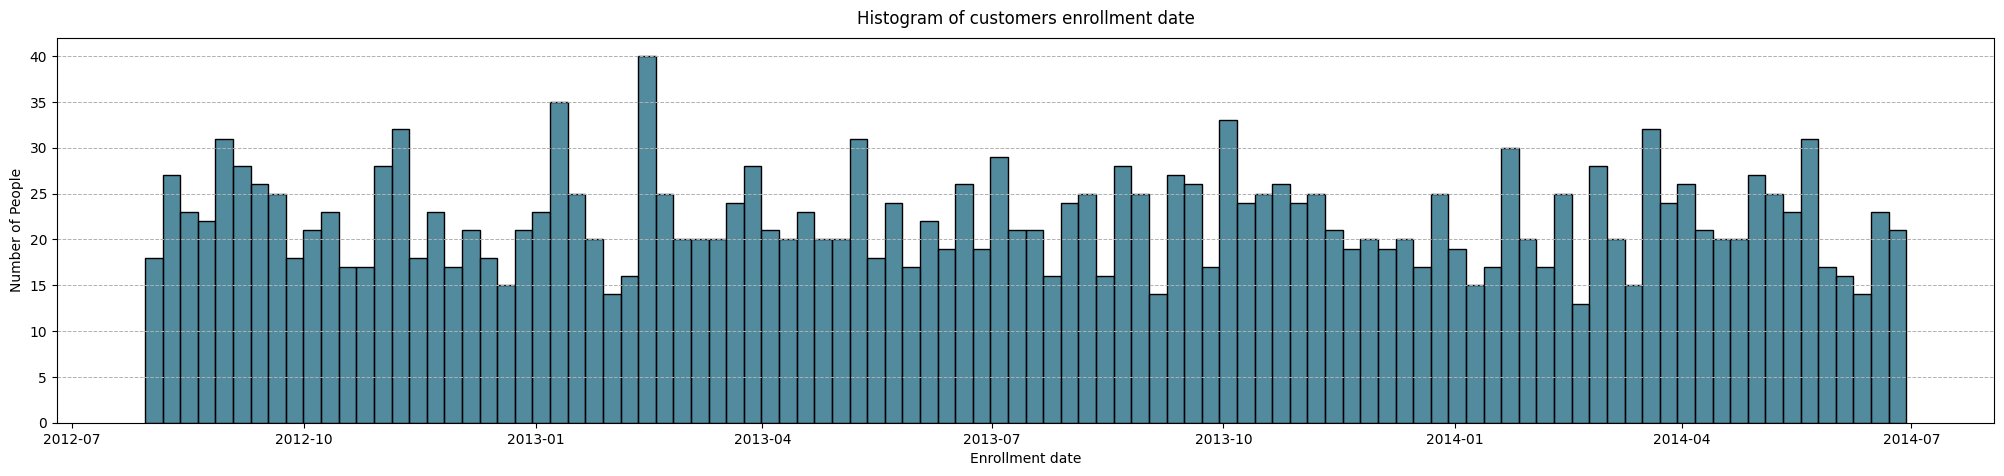

In [221]:
#plotting histogram of enrollment date
plt.figure(figsize=(25, 5))
dtGraf = sns.histplot(df["Enrollment_date"], color='#19647E', bins=100)
dtGraf.set_title("Histogram of customers enrollment date" , pad=10)

#adding grid
dtGraf.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7) 
dtGraf.set_ylabel('Number of People')
dtGraf.set_xlabel('Enrollment date')

plt.show()

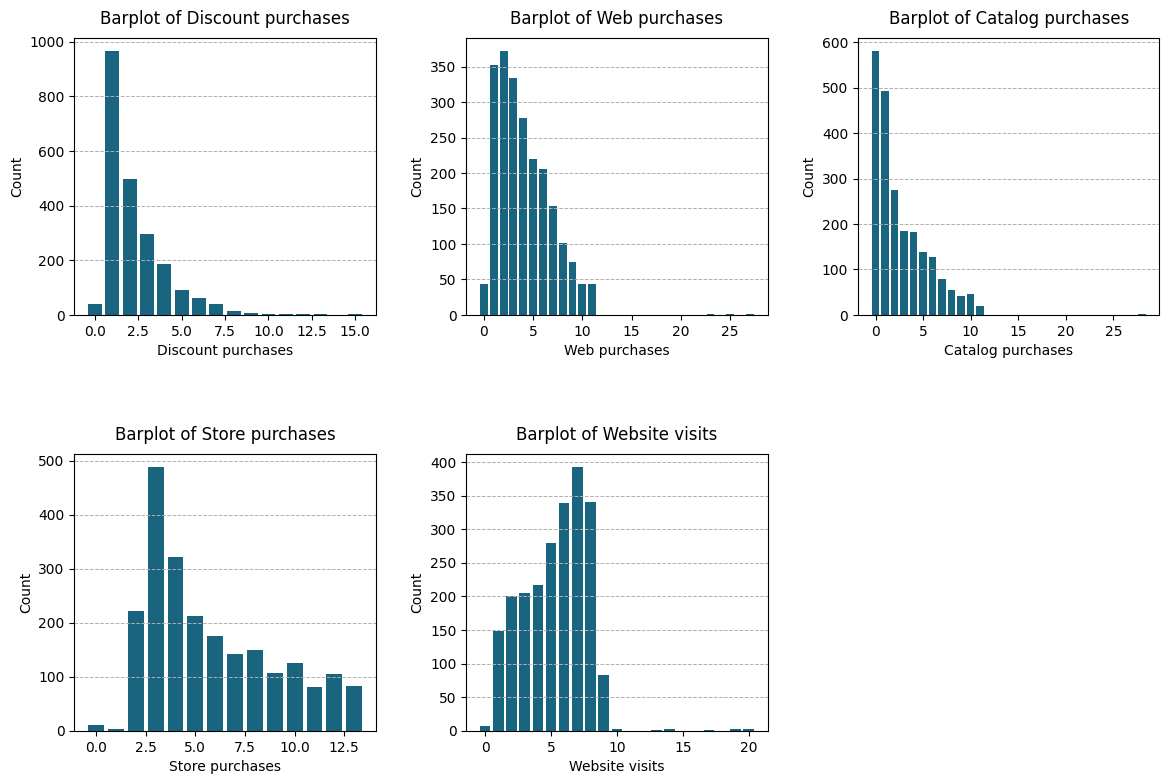

In [222]:
#columns that will be used in the plot
columns=["Discount_purchases", "Web_purchases", "Catalog_purchases", "Store_purchases", "Website_visits"]

#creates a plot with 2 rows and 3 columns and flattens the axes array in order to iterate over it
fig, axs = plt.subplots(2,3, figsize=(14, 9))
axs = axs.flatten()

#iterates over the columns and plots a barplot for each column
for i, column in enumerate(columns):
    ratings_count = df[column].value_counts().sort_index()
    bars = axs[i].bar(ratings_count.index, ratings_count.values, color='#19647E')
    axs[i].set_xlabel(column.replace("_", " "))
    axs[i].set_ylabel('Count')
    axs[i].set_title("Barplot of " + column.replace("_", " ") , pad=10)
    axs[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

axs[5].axis('off') # hides the last subplot

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [223]:
#as clustering is sensitive to outliers, i will drop the rows with outliers
df = df.drop(df[df["Discount_purchases"] > 7.5].index)
df = df.drop(df[df["Web_purchases"] > 12].index)
df = df.drop(df[df["Catalog_purchases"] > 12].index)
df = df.drop(df[df["Store_purchases"] < 2].index)
df = df.drop(df[df["Website_visits"] > 9].index)

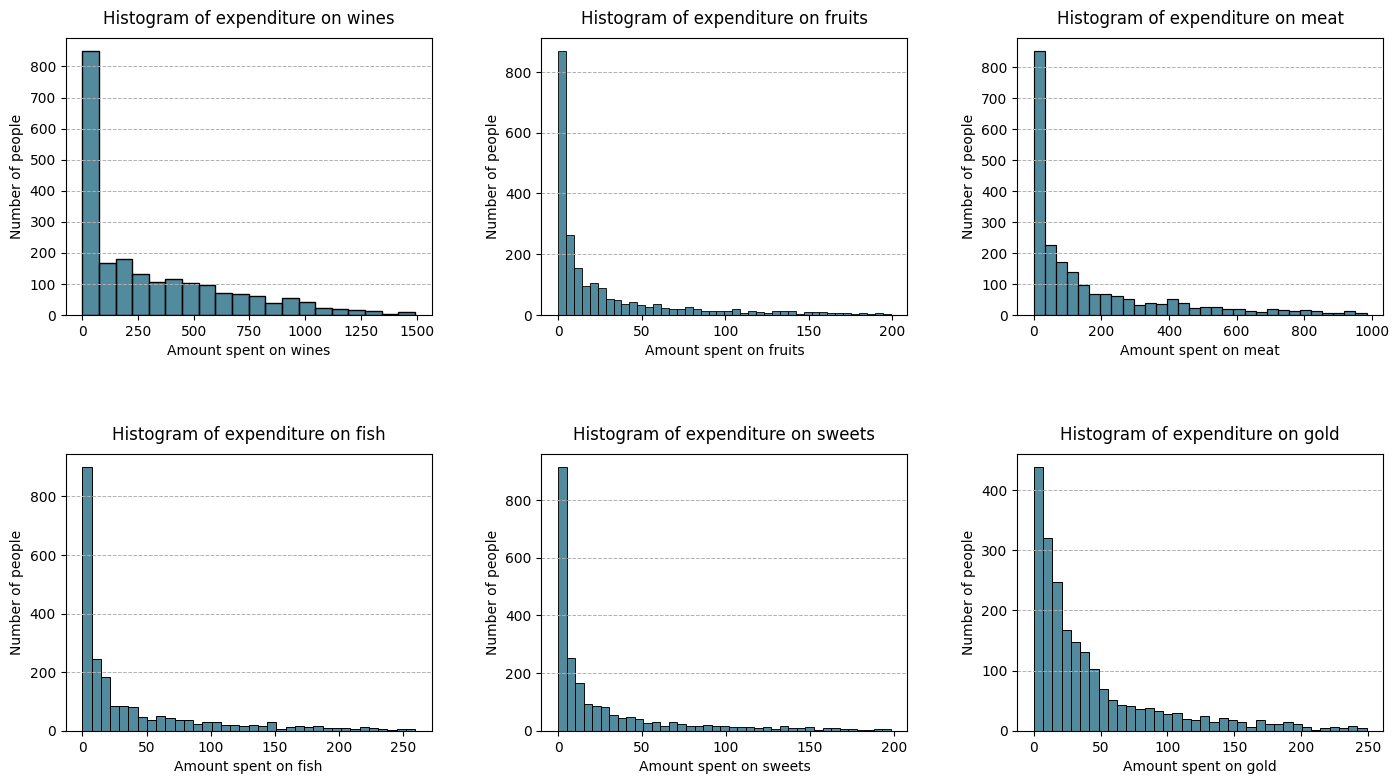

In [224]:
#list of columns that will be used in the plot
columns = ["Amount_wines", "Amount_fruits", "Amount_meat", "Amount_fish", "Amount_sweets", "Amount_gold"]

#plt.subplots() creates a plot with 6 subplots, 3 per row in 2 different rows
#figyre is the container for the plot; axs is 2X3 array
figure, axs = plt.subplots(2, 3, figsize=(17, 9))
# flattens 2D array of axes objects into 1D array
axs = axs.flatten()

#iterates through names of the columns from df that are saved in a list columns
#sns.histplot(df[column], ax=axs[i]) plots a histrogram of the specified column on the corresponding subplot axis
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=axs[i], color='#19647E')
    axs[i].set_title("Histogram of " + column.replace("Amount_", "expenditure on "), pad=10)
    axs[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
    axs[i].set_ylabel('Number of people')
    axs[i].set_xlabel(column.replace("_", " spent on "))

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [225]:
#counting the number of people that spent more than 1000 on meat, more than 200 on sweets and more than 270 on gold as they are outliers
#since their number is small, they will be dropped and that won't affect the model
print((df["Amount_meat"] > 1000).sum())
print((df["Amount_sweets"] > 200).sum())
print((df["Amount_gold"] > 270).sum())

df = df.drop(df[df['Amount_meat'] > 1000].index)
df = df.drop(df[df['Amount_sweets'] > 200].index)
df = df.drop(df[df['Amount_gold'] > 250].index)

0
0
0


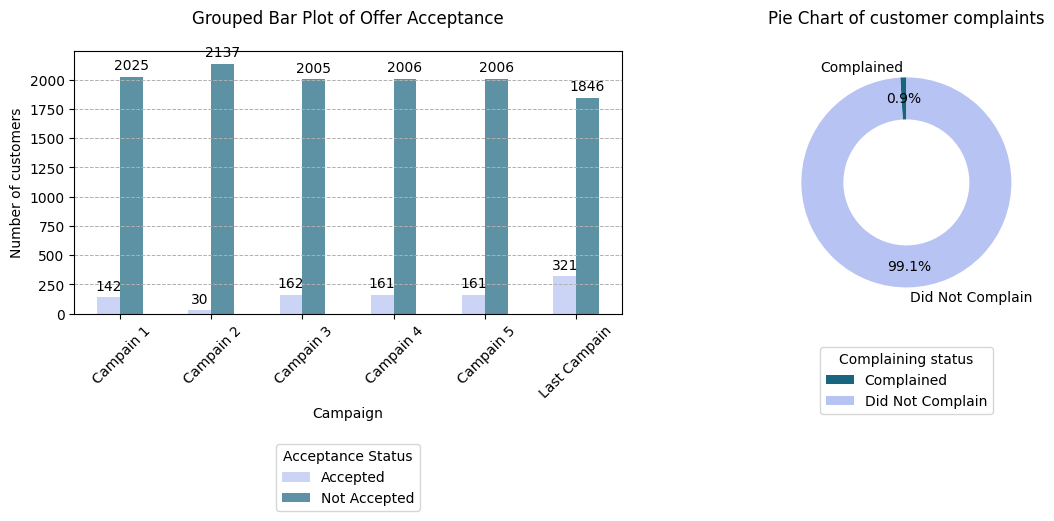

In [226]:
#creating a figure with 2 subplots and flattening the axes array
figure, axs = plt.subplots(1, 2, figsize=(12, 6))
axs = axs.flatten()
plt.subplots_adjust(bottom=0.2) # adjusting the bottom margin

#offer_columns is a list of columns that will be used in the plot
offer_columns = ["Offer_campain_1", "Offer_campain_2", "Offer_campain_3", "Offer_campain_4", "Offer_campain_5", "Last_campain"]

#Create a DataFrame to hold counts of accepted offers
offer_counts = pd.DataFrame()
#Calculate the count of accepted offers for each campaign
for column in offer_columns:
    offer_counts[column] = [df[column].sum(), df[column].count() - df[column].sum()]  # Count of 1s and 0s
#sets the index to be the counts (Accepted, Not Accepted)
offer_counts.index = ['Accepted', 'Not Accepted']

#complaints column has 1 for customers that complained and 0 for those that did not, so we can use sum() to get the count of complaints
complaint_counts = [df["Complain"].sum(), df["Complain"].count() - df["Complain"].sum()]  
complaint_labels = ['Complained', 'Did Not Complain']

#transpose the DataFrame to make it suitable for plotting
offer_counts = offer_counts.T

#creating the grouped bar plot for offers
offer_counts.plot(kind='bar', ax=axs[0], color=["#B7C3F3", "#19647E"], alpha=0.7)
axs[0].set_title("Grouped Bar Plot of Offer Acceptance", pad=20)
axs[0].set_xlabel("Campaign")
axs[0].set_ylabel("Number of customers")
axs[0].set_xticks(range(len(offer_columns))) # Set the x-ticks to be the number of columns
axs[0].set_xticklabels([col.replace("Offer", "").replace("_", " ").title() for col in offer_columns], rotation=45) # Set the x-tick labels
axs[0].legend(title="Acceptance Status", loc='upper center', bbox_to_anchor=(0.5, -0.47)) # Add the legend
axs[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7) # Add grid

#adding the counts on top of the bars
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', padding=3)

#creating a bar plot for complaints
axs[1].pie(complaint_counts, labels=complaint_labels, autopct='%1.1f%%', startangle=90, colors=["#19647E", "#B7C3F3"], wedgeprops=dict(width=0.4), pctdistance=0.8) 
axs[1].set_title("Pie Chart of customer complaints", pad=20)
axs[1].legend(title="Complaining status", loc='upper center', bbox_to_anchor=(0.5, -0.1))

#adjusting layout
plt.tight_layout()
plt.show()

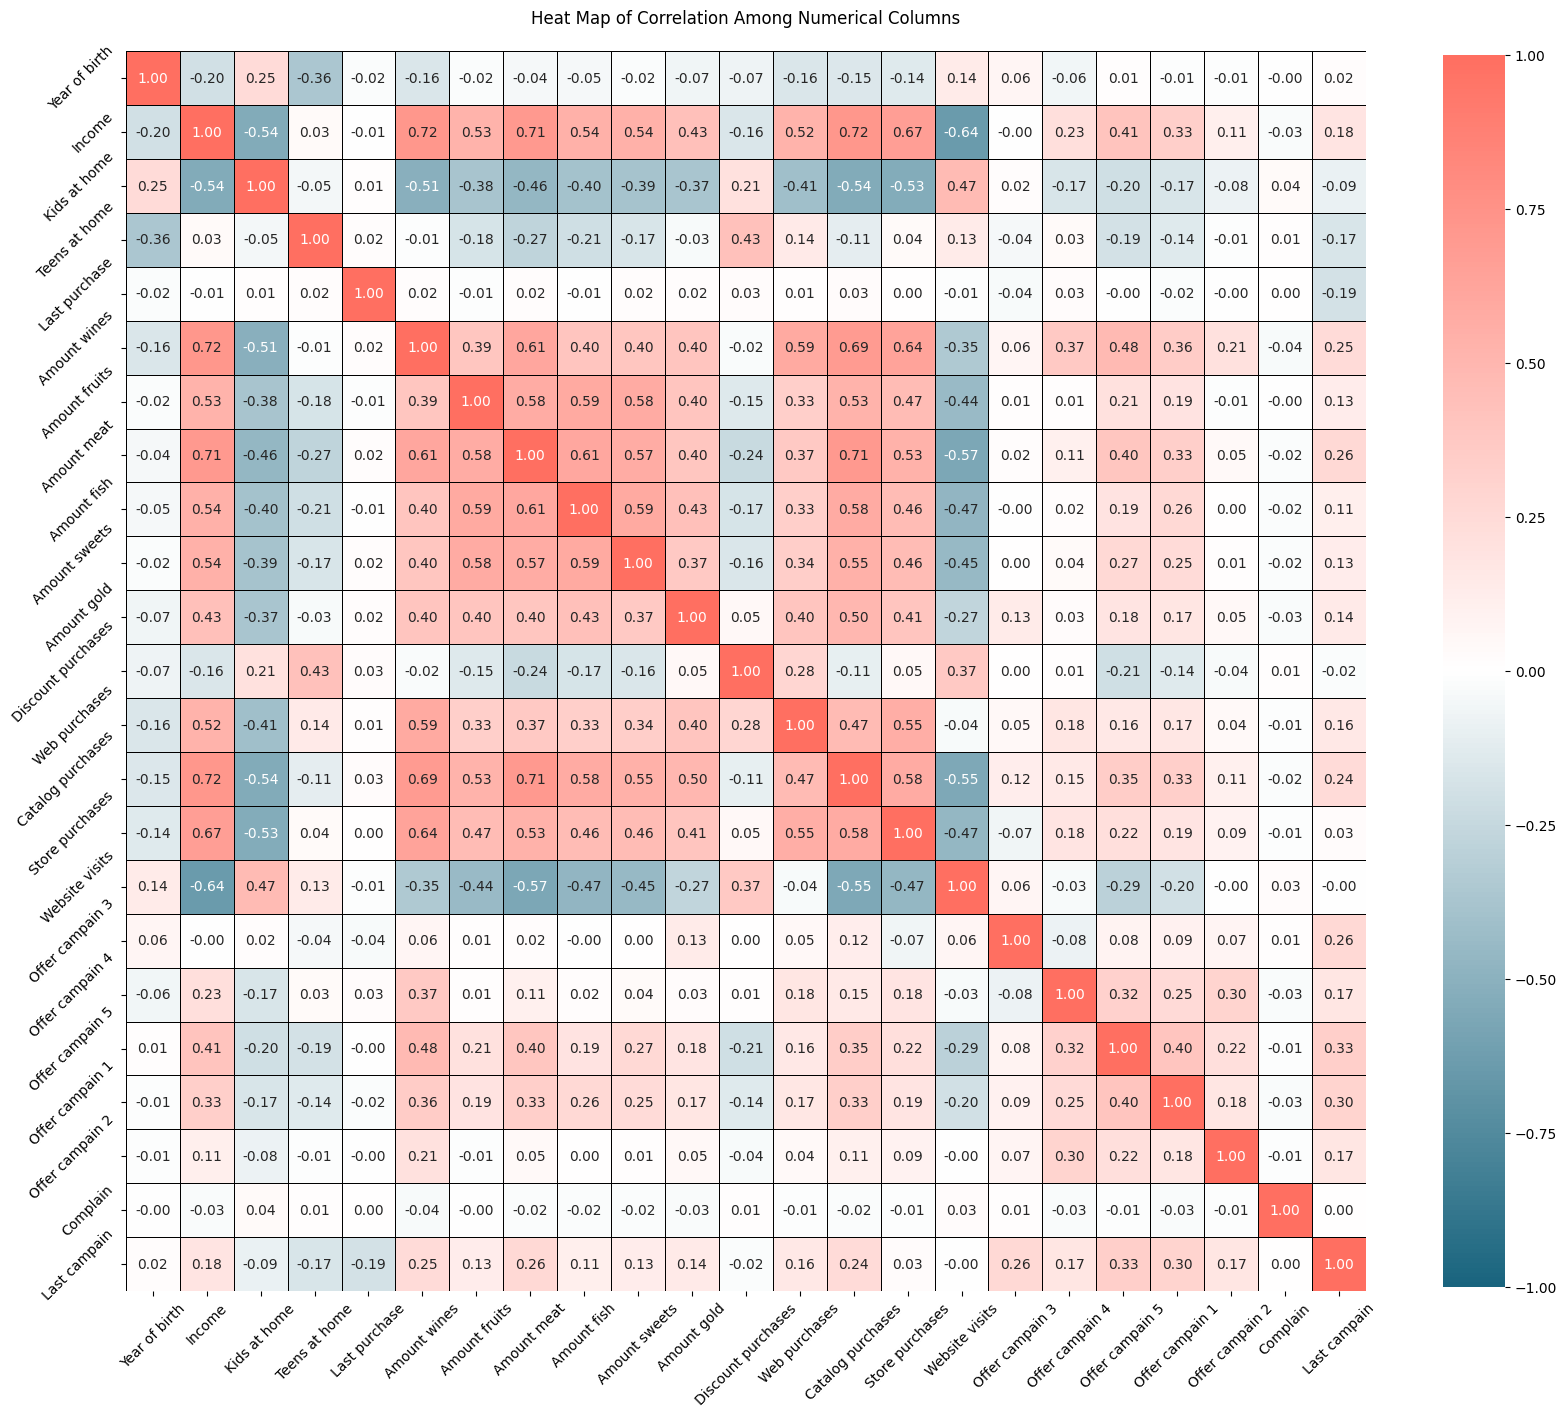

In [227]:
numeric_df = df.select_dtypes(include=[np.number]) #to get only numerical columns
numeric_df.drop(['ID'], axis=1, inplace=True) #drop the ID column
correlation_matrix = numeric_df.corr() #calculate the correlation matrix

custom_colors = ['#19647E', '#FFFFFF', '#FF6F61']  # colors for the heatmap
custom_cmap = lsc.from_list("custom_cmap", custom_colors) # create a custom color map

#plotting the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap, square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Heat Map of Correlation Among Numerical Columns', pad=20)
plt.xticks(ticks=np.arange(len(numeric_df.columns)) + 0.5, labels=numeric_df.columns.str.replace("_", " "), rotation=45) #set the x-ticks
plt.yticks(ticks=np.arange(len(numeric_df.columns)) + 0.5, labels=numeric_df.columns.str.replace("_", " "), rotation=45) #set the y-ticks

plt.show()

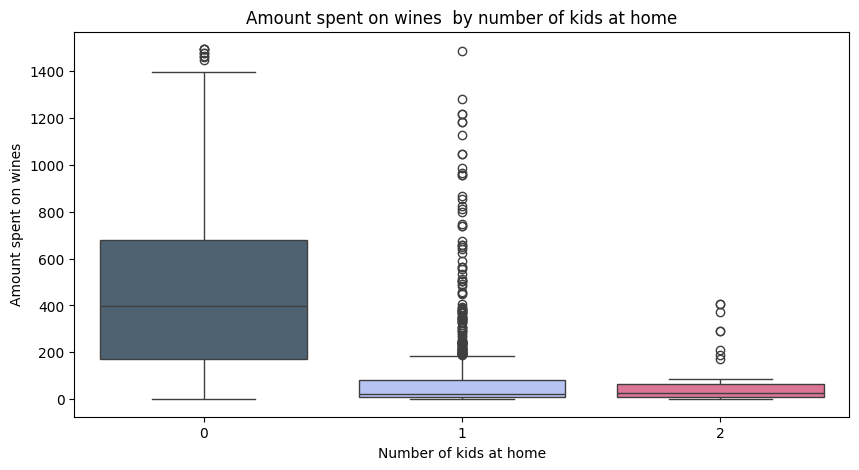

In [228]:
#ploting the boxplot that shows the amount spent on wines by number of kids at home
plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(x='Kids_at_home', y='Amount_wines', data=df, patch_artist=True) 
plt.title('Amount spent on wines  by number of kids at home')
plt.xlabel('Number of kids at home')
plt.ylabel('Amount spent on wines')

#colors for the boxplot, one color for each unique value of the column
for patch, color in zip(boxplot.patches, colors[:len(df['Education'].unique())]):
    patch.set_facecolor(color)

plt.show()

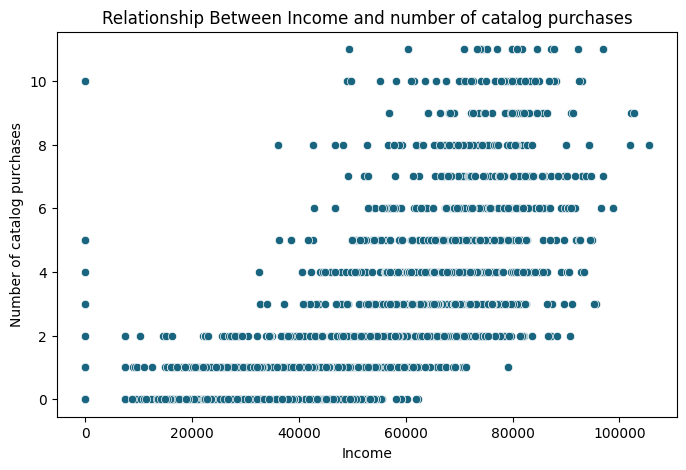

In [229]:
#plotting scatter plot of income and amount spent on wines
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income', y='Catalog_purchases', data=df, color='#19647E')
plt.title('Relationship Between Income and number of catalog purchases')
plt.xlabel('Income')
plt.ylabel('Number of catalog purchases')
plt.show()


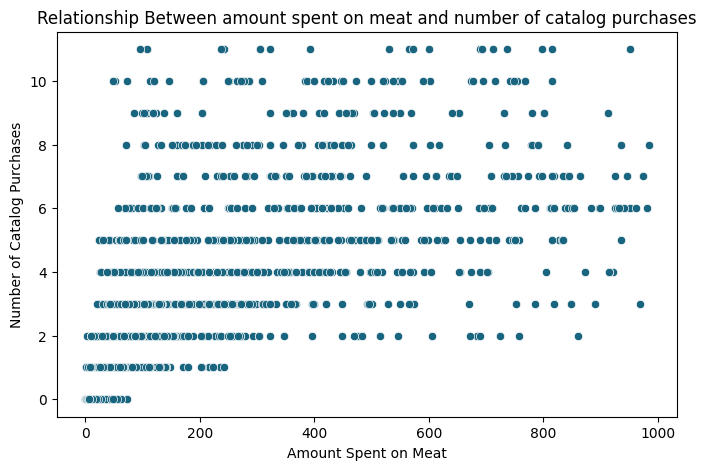

In [230]:
#plotting scatter plot of amount spent on meat and number of catalog purchases
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Amount_meat', y='Catalog_purchases', data=df, color='#19647E')
plt.title('Relationship Between amount spent on meat and number of catalog purchases')
plt.xlabel('Amount Spent on Meat')
plt.ylabel('Number of Catalog Purchases')
plt.show()

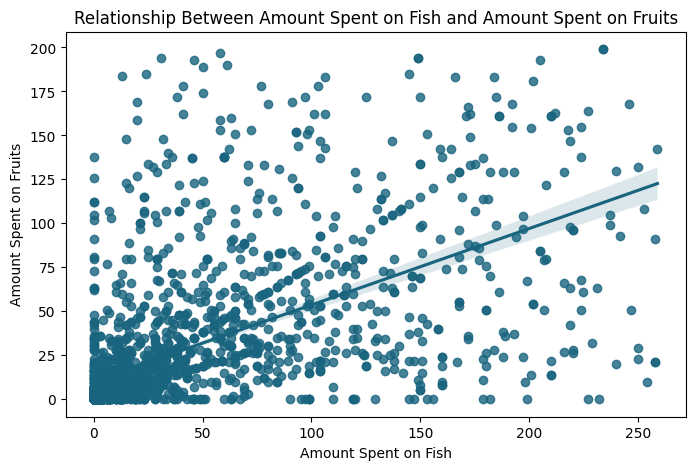

In [231]:
#plotting a regression plot of amount spent on fish and amount spent on fruits
plt.figure(figsize=(8, 5))
sns.regplot(x='Amount_fish', y='Amount_fruits', data=df, color='#19647E')
plt.title('Relationship Between Amount Spent on Fish and Amount Spent on Fruits')
plt.xlabel('Amount Spent on Fish')
plt.ylabel('Amount Spent on Fruits')
plt.show()

<h2>Step 2: Building models</h2>

<h3>Clustering algorithm 1: K-Means Clustering (no scaling)</h3>

In [232]:
#setting a reference date- it will be 01-01-2015 as latest enrollment date is in 2014
reference_date = pd.to_datetime('01-01-2015')

#calculating the difference in days
df['Days_since_enrolled'] = (df["Enrollment_date"] - reference_date).dt.days

In [ ]:
#converting non-numeric columns to numeric using one-hot encoding as the k-means model can't work with non-numeric data
df = pd.get_dummies(df, columns=["Education", "Marital_Status"], drop_first=True)

#convering true/false columns to 1/0
df = df.astype(int)

#addding the column to the encoded dataframe and dropping the enrollment date column
df['Days_since_enrolled'] = df['Days_since_enrolled']
df.drop(['Enrollment_date'], axis=1, inplace=True)

#drop the ID column
df.drop(['ID'], axis=1, inplace=True)

<h4>Elbow method</h4>

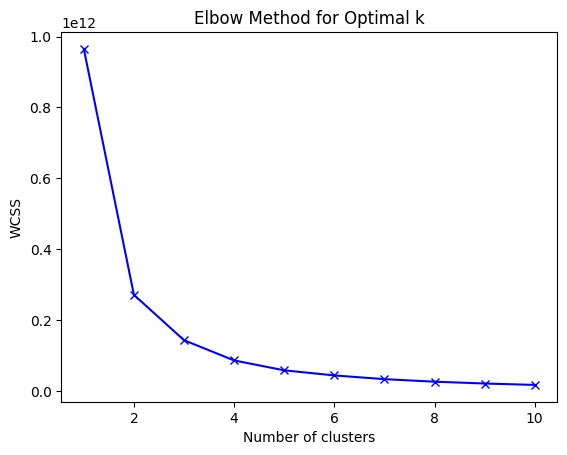

In [ ]:
#calculating data for elbow method and showing it on a plot
wcss = [] #wcss is the sum of squared distances of samples to their closest cluster center
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

#ploting the Elbow Curve
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


<p>Acording to Elbow method, optimal numbers of clusters is where the "elbow" sharply slows down, meaning that adding more clusters that that wouldn't improve clustering.<br>In this case that is at point 3, which means that optimal number of clusters is <b>3</b>.</p>

<h4>Silhouette Method<h4>

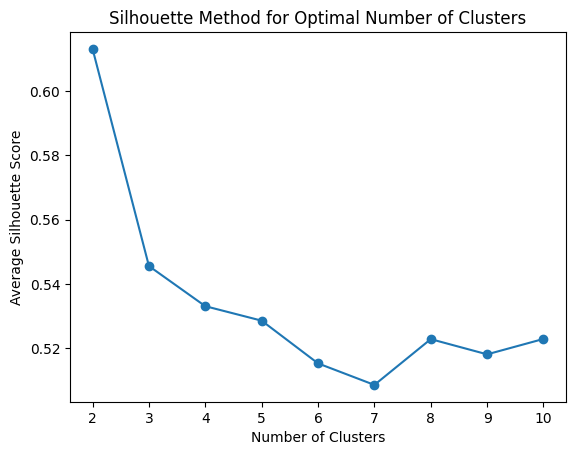

In [ ]:
#range will show silhouette scores for different values of k, aim is to find the value of k that gives the highest silhouette score, i set range from 2 to 10
range_n_clusters = range(2, 11)
silhouette_avg_scores = []
data = df

#interating over the range and calculating the silhouette score for each value of k and appending it to the silhouette_avg_scores list
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=10) #creating the k-means model
    cluster_labels = kmeans.fit_predict(data) #fitting the model and predicting the clusters
    silhouette_avg = silhouette_score(data, cluster_labels) #calculating the silhouette score
    silhouette_avg_scores.append(silhouette_avg) #appending the silhouette score to the list

plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Method for Optimal Number of Clusters")
plt.show()

<p>Silhouette score is measured between 0 and 1. A score closer to 1 indicates that the data point is very similar to other data points in the cluster, and dissimilar to data points in other clusters. Thats why we chose the highest value of k that has the highest silhouette score- In this case, k=2 </p>

<b>Based on results from the Silhouette score and the Elbow Method, I will choose 3 clusters.</b>

In [ ]:
#creating  k-means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df) #fits the model and predict the clusters

In [ ]:
pd.set_option('display.max_columns', None) 
#displaying cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df.drop(columns=['Cluster']).columns)
print(cluster_centers)

   Year_of_birth        Income  Kids_at_home  Teens_at_home  Last_purchase  \
0    1967.383966  75421.654008      0.085795       0.376934      49.052039   
1    1973.085434  27379.809524      0.813725       0.310924      48.885154   
2    1966.428571  51167.181941      0.409704       0.795148      50.115903   

   Amount_wines  Amount_fruits  Amount_meat  Amount_fish  Amount_sweets  \
0    624.592124      56.511955   385.630098    80.935302      58.881857   
1     33.189076       6.296919    24.278711     9.732493       6.399160   
2    257.219677      17.659030    89.389488    23.801887      16.438005   

   Amount_gold  Discount_purchases  Web_purchases  Catalog_purchases  \
0    70.496484            1.596343       5.497890           5.322082   
1    16.675070            2.063025       2.079832           0.528011   
2    42.781671            2.814016       4.491914           2.099730   

   Store_purchases  Website_visits  Offer_campain_3  Offer_campain_4  \
0         8.514768       

This data (the table above) indicates which features are more or less important in clustering. Based on these values, visualizations will be displayed.

In [238]:
df_encoded.head(20)

,Year_of_birth,Income,Kids_at_home,Teens_at_home,Last_purchase,Amount_wines,Amount_fruits,Amount_meat,Amount_fish,Amount_sweets,Amount_gold,Discount_purchases,Web_purchases,Catalog_purchases,Store_purchases,Website_visits,Offer_campain_3,Offer_campain_4,Offer_campain_5,Offer_campain_1,Offer_campain_2,Complain,Last_campain,Days_since_enrolled,Education_Secondary,Education_Tertiary,Marital_Status_Married,Marital_Status_Single,Cluster
0,1957,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,-849,0,1,0,1,2
1,1954,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,-299,0,1,0,1,2
2,1965,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,-498,0,1,0,0,0
3,1984,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,-325,0,1,0,0,1
4,1981,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,-347,0,0,1,0,2
5,1967,62513,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,-479,0,1,0,0,2
6,1971,55635,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,-779,0,1,0,1,2
7,1985,33454,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,-603,0,0,1,0,1
8,1974,30351,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,-574,0,0,0,0,1
10,1983,0,1,0,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,-412,0,1,1,0,1


Cluster 2: 742
Cluster 1: 714
Cluster 0: 711


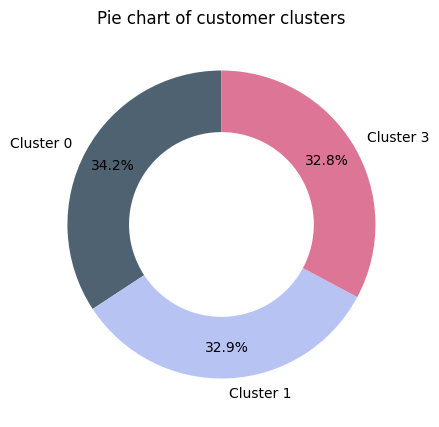

In [239]:
#print number of customers in each cluster  and plot a pie chart
for cluster, count in df_encoded['Cluster'].value_counts().items():
    print(f"Cluster {cluster}: {count}")

plt.figure(figsize=(5, 5))
plt.pie(df_encoded['Cluster'].value_counts(), labels=['Cluster 0', 'Cluster 1', 'Cluster 3'], autopct='%1.1f%%', startangle=90, colors=['#4F6272', '#B7C3F3', '#DD7596'], wedgeprops=dict(width=0.4), pctdistance=0.8)   
plt.title("Pie chart of customer clusters")
plt.show()

<p>PCA (Principal Component Analysis)</p>
PCA combines different features into 2 or 3 components. Here, we can see three clusters visualized using only 2 dimensions, and in the next chart, 3 dimensions. One dimension can represent multiple features.

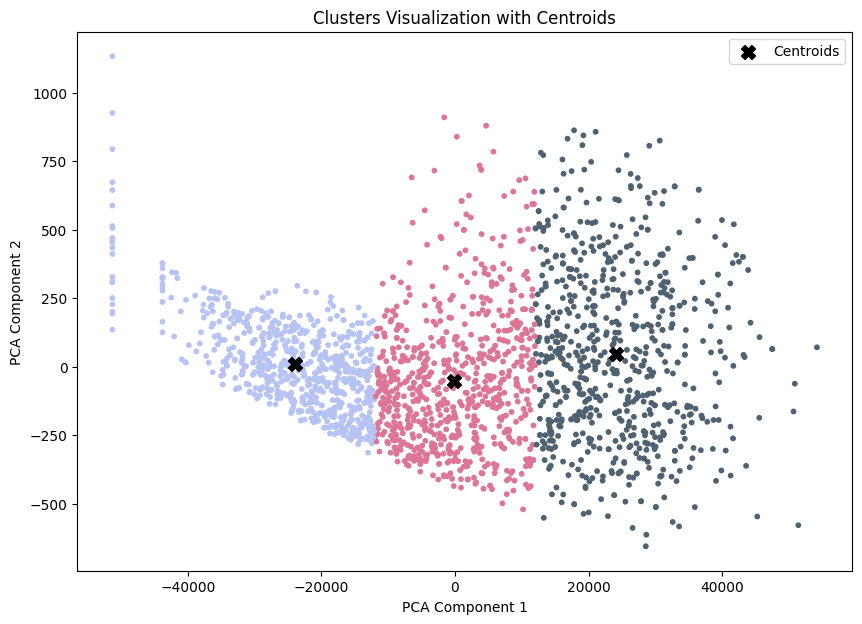

In [240]:
#choosing the colors for the clusters
my_colors = ['#4F6272', '#B7C3F3', '#DD7596']
cmap = lsc.from_list("custom_cmap", my_colors)

# Drop the 'Cluster' column before fitting and transforming the data with PCA
df_encoded_no_cluster = df_encoded.drop(columns=['Cluster'])

#creating the PCA model and transforming the data
pca = PCA(n_components=2) #defining nr of components (dimensions)
pca_components = pca.fit_transform(df_encoded_no_cluster) #adding my data to the model and transforming it


# Transforming the cluster centers using the same PCA transformation
cluster_centers_pca = pca.transform(cluster_centers)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_encoded['Cluster'], cmap=cmap, s=10)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='black', s=100, marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization with Centroids')

plt.legend()
plt.show()


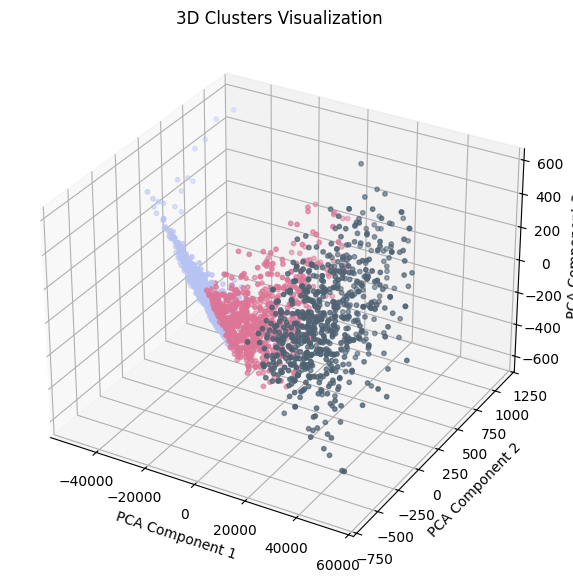

In [241]:
pca = PCA(n_components=3) #setting components to 3 to plot 3D scatter plot
pca_components = pca.fit_transform(df_encoded) #adding the data

#creating the 3D scatter plot of the clusters
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c=df_encoded['Cluster'], cmap=cmap, s=10)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Clusters Visualization')

plt.show()

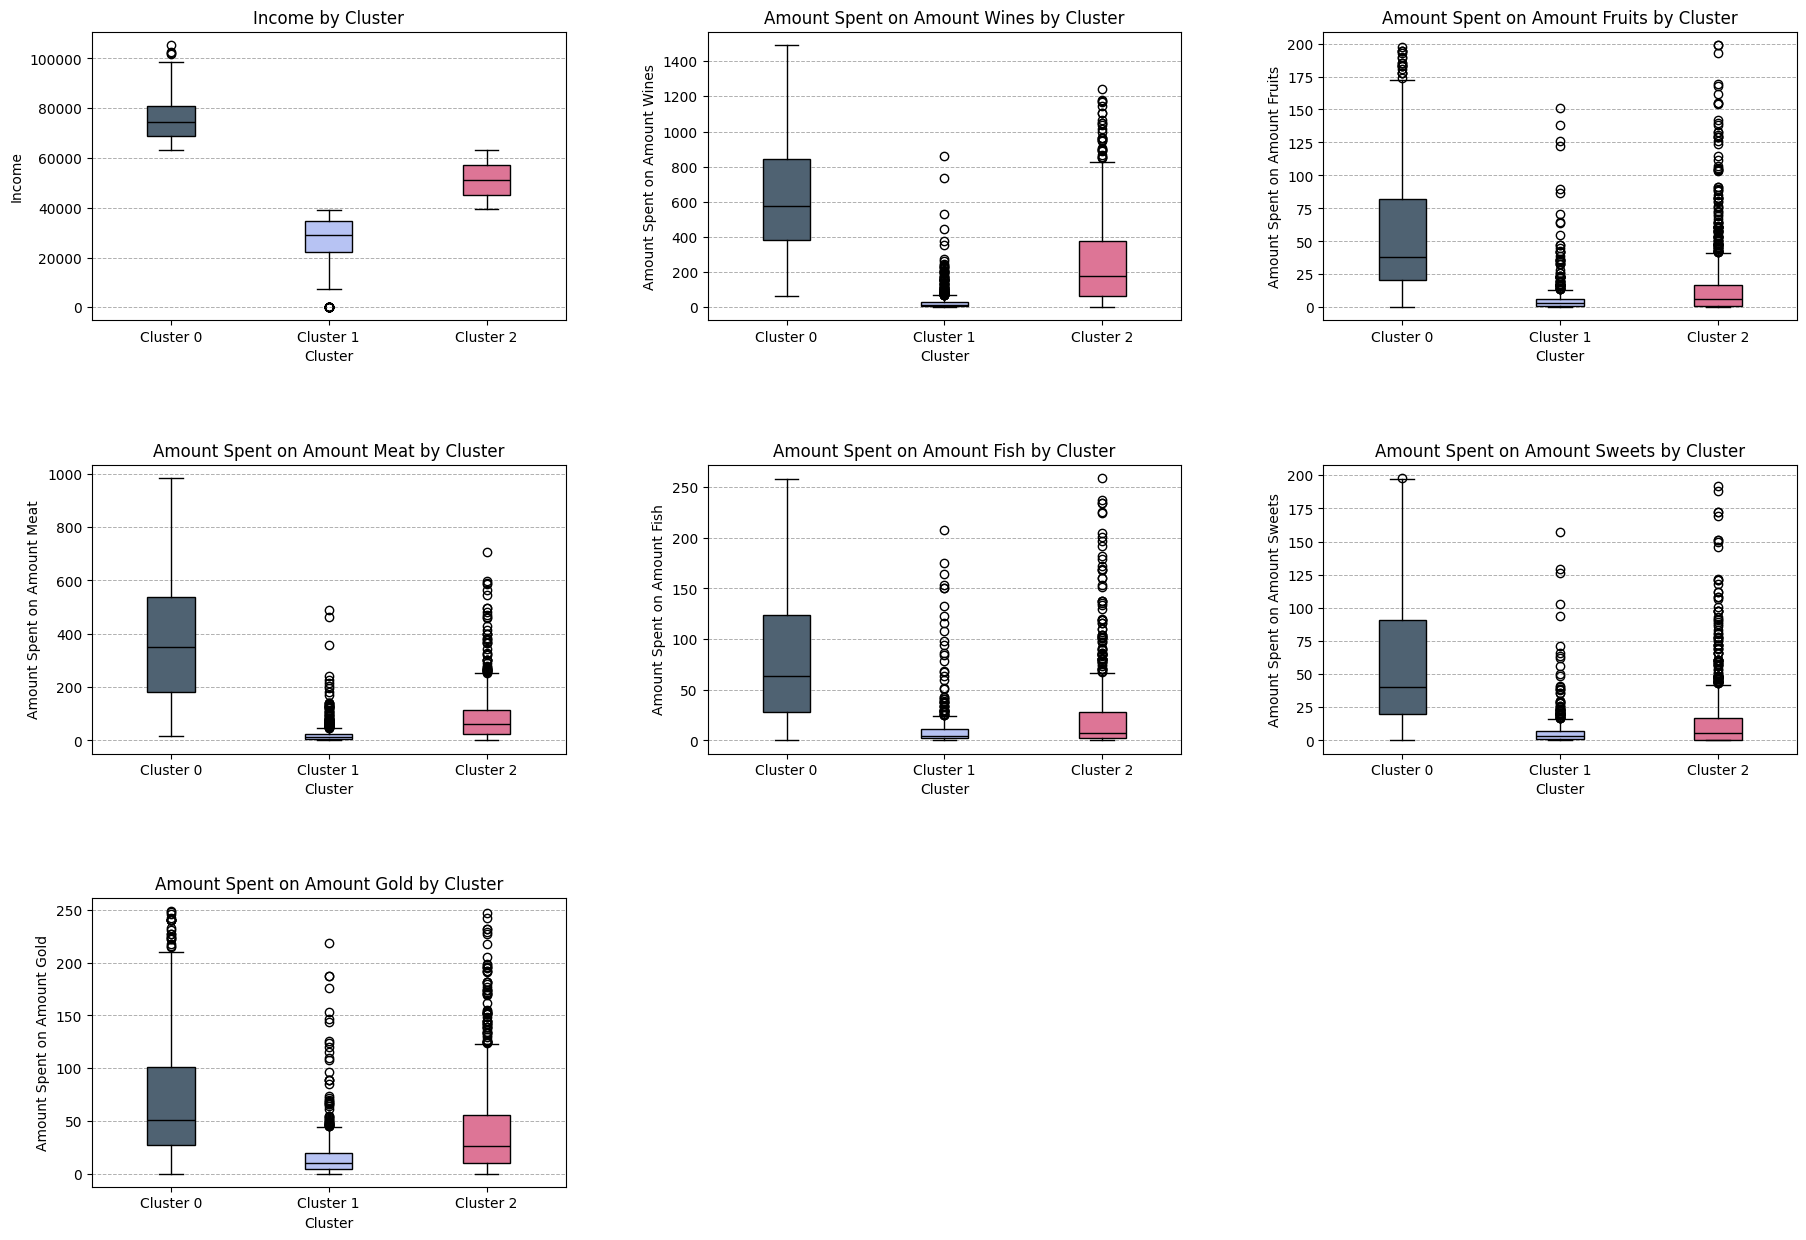

In [242]:
#colors that will be used in plots
my_colors = ['#4F6272', '#B7C3F3', '#DD7596']

#creating aplot with subpqplots
figure, axs = plt.subplots(3, 3, figsize=(22, 15))
axs = axs.flatten()
for ax in axs:
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7) #adding grid

#creating the k-means model with 3 clusters
df_encoded['Cluster'] = kmeans.labels_

#first plot will be a boxplot of income by cluster
box = axs[0].boxplot([df_encoded[df_encoded['Cluster'] == 0]['Income'],
                      df_encoded[df_encoded['Cluster'] == 1]['Income'],
                      df_encoded[df_encoded['Cluster'] == 2]['Income']],
                      patch_artist=True, medianprops=dict(color='black'))
axs[0].set_title("Income by Cluster")
axs[0].set_xlabel("Cluster")
axs[0].set_ylabel("Income")
axs[0].set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])
for patch, color in zip(box['boxes'], my_colors):
    patch.set_facecolor(color)

#other will be plots for spending on different product groups by cluster and it will be done automatically
for i, feature in enumerate(['Amount_wines', 'Amount_fruits', 'Amount_meat', 
                             'Amount_fish', 'Amount_sweets', 'Amount_gold'], start=1):
    box = axs[i].boxplot([df_encoded[df_encoded['Cluster'] == 0][feature],
                          df_encoded[df_encoded['Cluster'] == 1][feature],
                          df_encoded[df_encoded['Cluster'] == 2][feature]],
                          patch_artist=True, medianprops=dict(color='black'))
    axs[i].set_title(f"Amount Spent on {feature.replace('_', ' ').title()} by Cluster")
    axs[i].set_xlabel("Cluster")
    axs[i].set_ylabel(f"Amount Spent on {feature.replace('_', ' ').title()}")
    axs[i].set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    for patch, color in zip(box['boxes'], my_colors):
        patch.set_facecolor(color)

#removing "empty" subplots
axs[7].axis('off')
axs[8].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


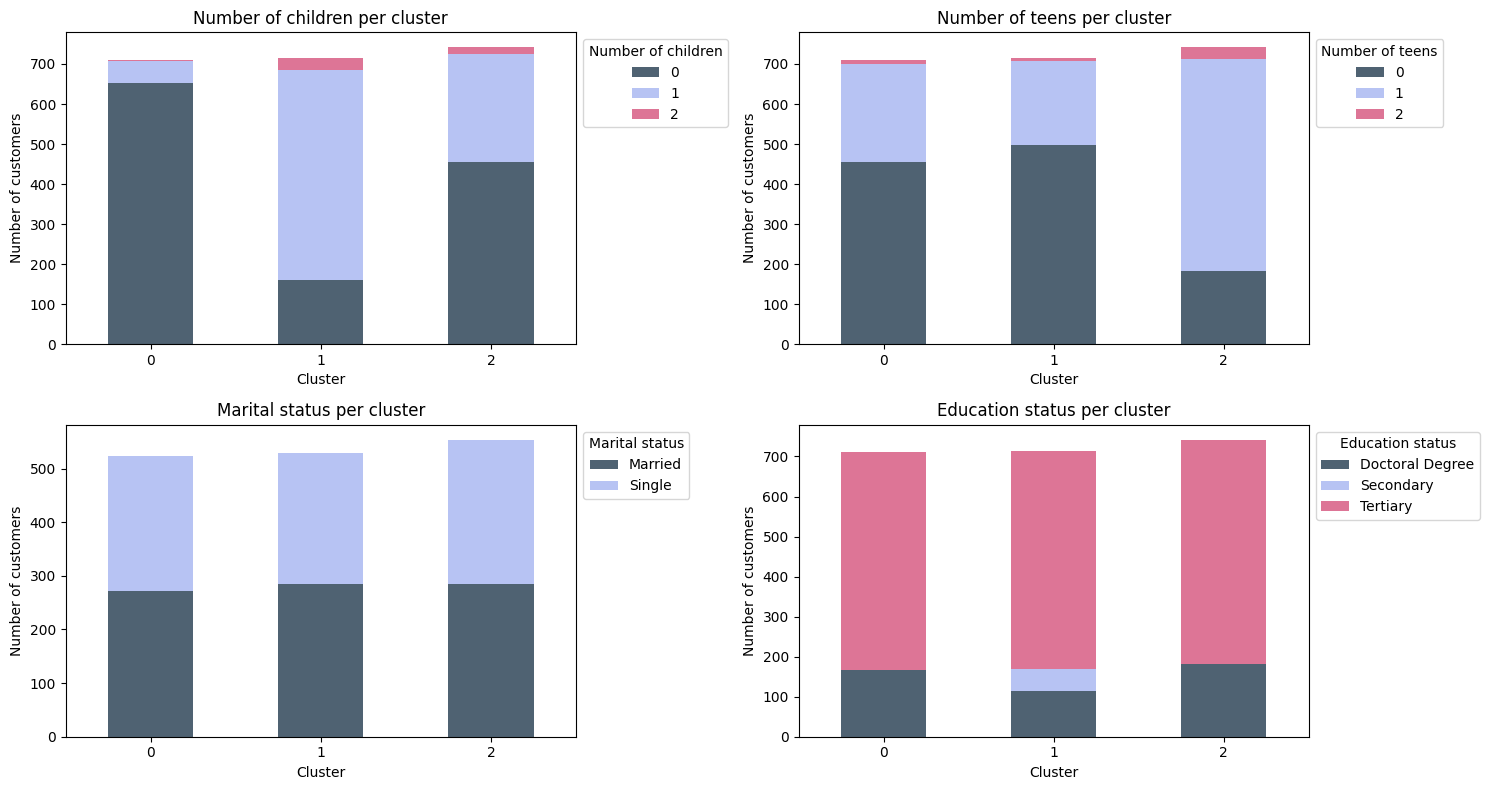

In [243]:
#adding cluster column to the original dataframe as i want to show some features that i splited for the clustering
df['Cluster'] = df_encoded['Cluster']
#my colors for the plots
my_colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FFC857', '#119DA4', '#19647E', '#FF6F61', '#6A0572']

#creating a 2X2 plot
figure, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.flatten()

#first plot: number of children per cluster
children_at_home = df[df['Kids_at_home'].isin([0, 1, 2, 3])].groupby(['Cluster', 'Kids_at_home']).size().unstack()
#plotting the bar plot
children_at_home.plot(kind='bar', stacked=True, color=my_colors[:len(children_at_home.columns)], ax=axs[0])
axs[0].set_title("Number of children per cluster")
axs[0].set_xlabel("Cluster")
axs[0].set_ylabel("Number of customers")
axs[0].xaxis.set_tick_params(rotation=0)
axs[0].legend(title="Number of children", bbox_to_anchor=(1.0, 1), loc='upper left')

#second plot: number of teens per cluster
teens_at_home = df[df['Teens_at_home'].isin([0, 1, 2, 3])].groupby(['Cluster', 'Teens_at_home']).size().unstack()
teens_at_home.plot(kind='bar', stacked=True, color=my_colors[:len(teens_at_home.columns)], ax=axs[1])
axs[1].set_title("Number of teens per cluster")
axs[1].set_xlabel("Cluster")
axs[1].set_ylabel("Number of customers")
axs[1].xaxis.set_tick_params(rotation=0)
axs[1].legend(title="Number of teens" , bbox_to_anchor=(1.0, 1), loc='upper left')

#third plot: marital status per cluster
marital_status = df[df['Marital_Status'].isin(['Single', 'Together', 'Married', 'Divorced', 'Widow'])].groupby(['Cluster', 'Marital_Status']).size().unstack()
marital_status.plot(kind='bar', stacked=True, color=my_colors[:len(marital_status.columns)], ax=axs[2])
axs[2].set_title("Marital status per cluster")
axs[2].set_xlabel("Cluster")
axs[2].set_ylabel("Number of customers")
axs[2].xaxis.set_tick_params(rotation=0)
axs[2].legend(title="Marital status" , bbox_to_anchor=(1.0, 1), loc='upper left')

#fourth plot: education status per cluster
education_status = df[df['Education'].isin(['Secondary', 'Tertiary', 'Doctoral Degree'])].groupby(['Cluster', 'Education']).size().unstack()
education_status.plot(kind='bar', stacked=True, color=my_colors[:len(education_status.columns)], ax=axs[3])
axs[3].set_title("Education status per cluster")
axs[3].set_xlabel("Cluster")
axs[3].set_ylabel("Number of customers")
axs[3].xaxis.set_tick_params(rotation=0)
axs[3].legend(title="Education status", bbox_to_anchor=(1.0, 1), loc='upper left')


plt.tight_layout()
plt.show()


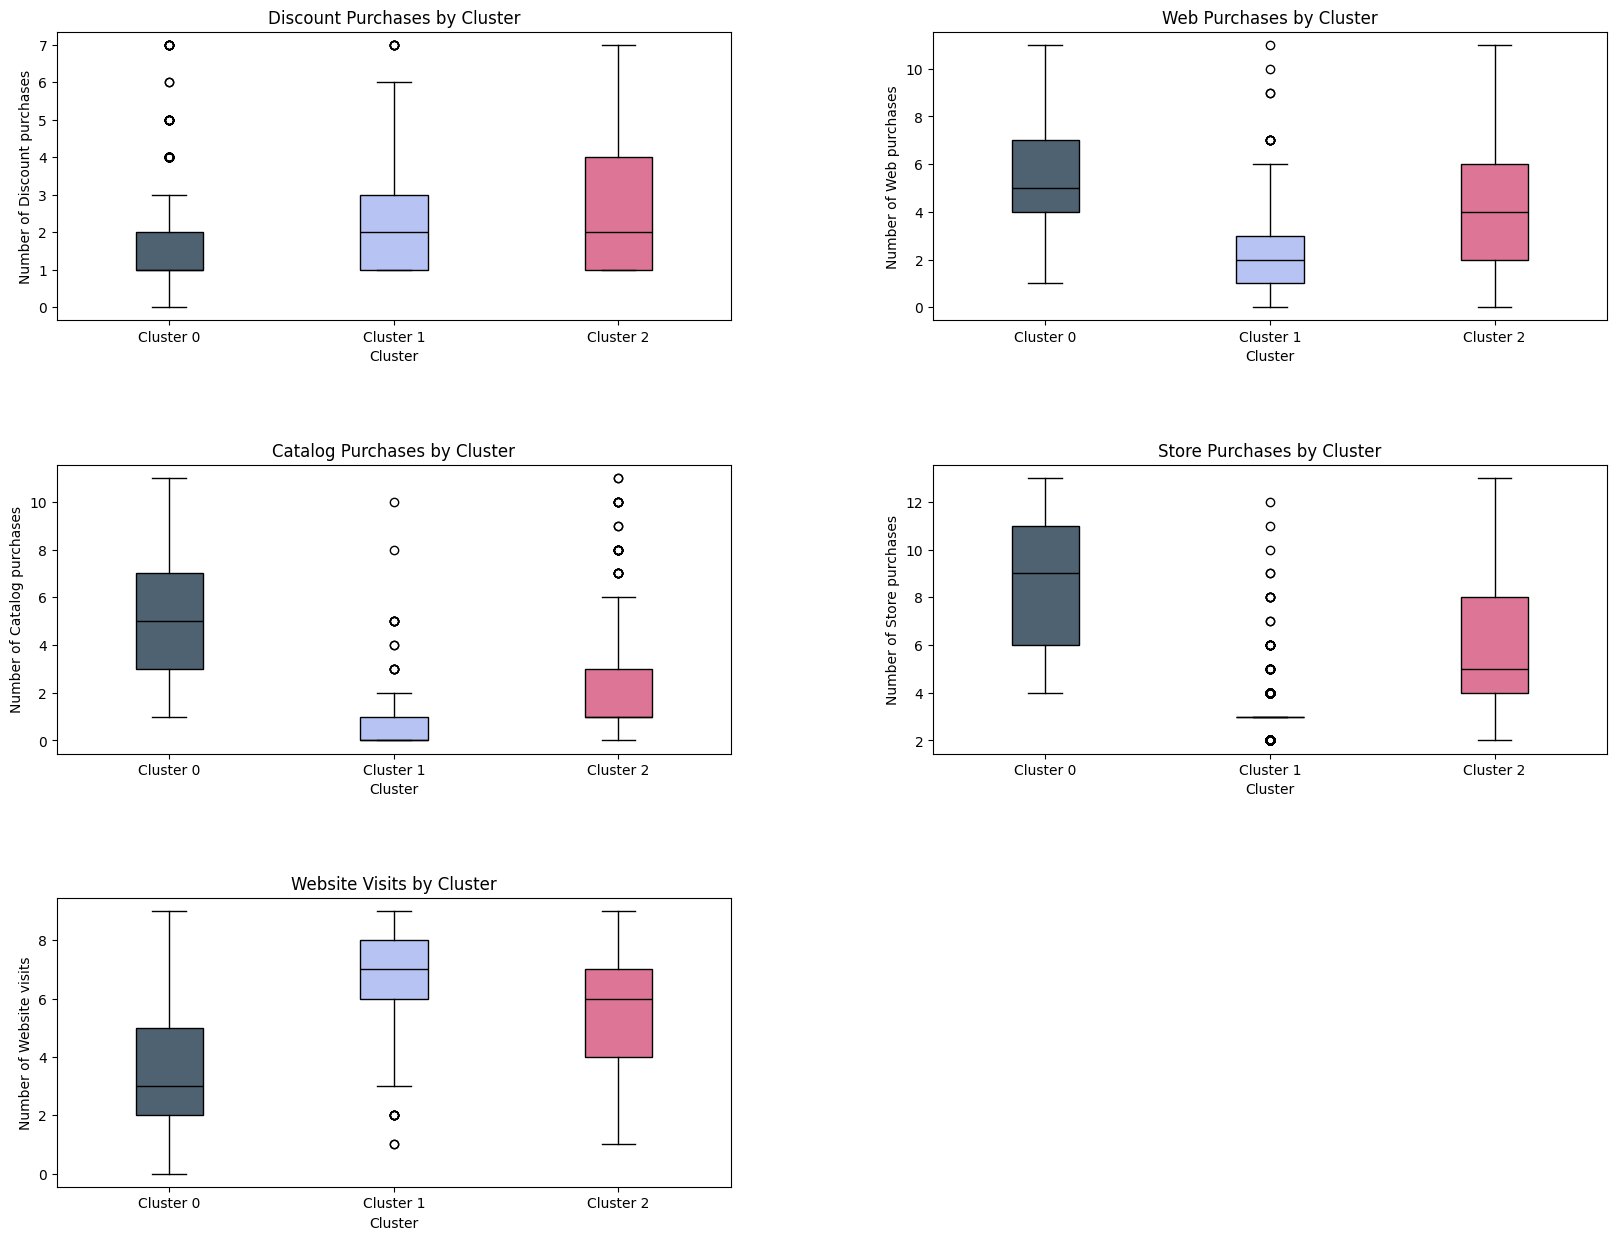

In [244]:
#specifying colors, columns and titles for the plots
my_colors = ['#4F6272', '#B7C3F3', '#DD7596']
features = ['Discount_purchases', 'Web_purchases', 'Catalog_purchases', 'Store_purchases', 'Website_visits']
titles = ["Discount Purchases by Cluster", "Web Purchases by Cluster", "Catalog Purchases by Cluster", "Store Purchases by Cluster", "Website Visits by Cluster"]
#creating a 3X2 plot
figure, axs = plt.subplots(3, 2, figsize=(20, 15))
axs = axs.flatten()
#iterating over the features and plotting the boxplot for each feature
for i, feature in enumerate(features):
    box = axs[i].boxplot([df_encoded[df_encoded['Cluster'] == cluster][feature] for cluster in range(3)],
                         patch_artist=True, medianprops=dict(color='black'))
    axs[i].set_title(titles[i])
    axs[i].set_xlabel("Cluster")
    axs[i].set_ylabel(f"Number of {feature.replace('_', ' ').capitalize()}")
    axs[i].set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    
    #setting colors for the boxes
    for patch, color in zip(box['boxes'], my_colors):
        patch.set_facecolor(color)

#last plot will be hidden
axs[5].axis('off')
#adding space between the plots
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


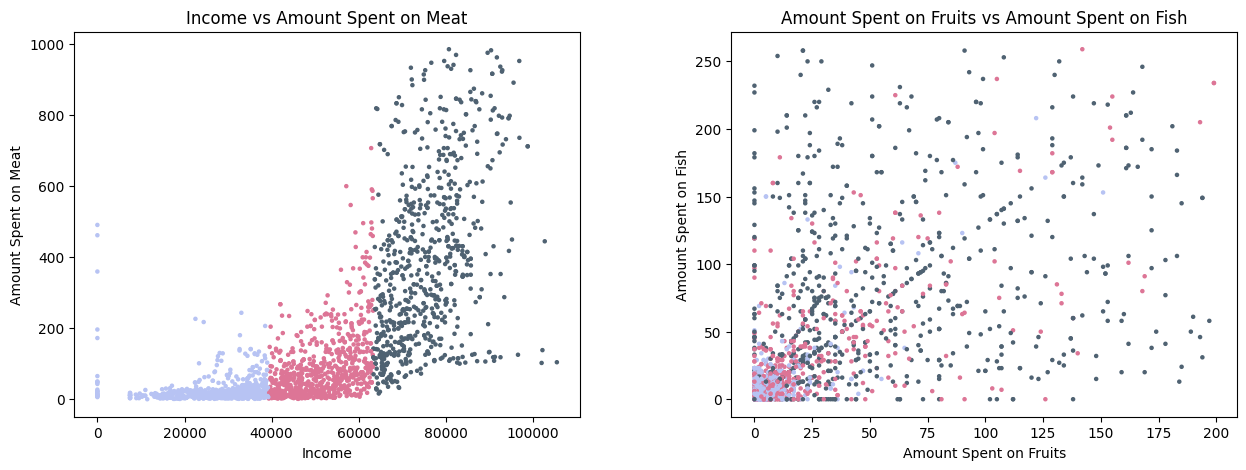

In [245]:
figure, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

axs[0].scatter(df_encoded['Income'], df_encoded['Amount_meat'], c=df_encoded['Cluster'], cmap=cmap, s=5)
axs[0].set_title("Income vs Amount Spent on Meat")
axs[0].set_xlabel("Income")
axs[0].set_ylabel("Amount Spent on Meat")

axs[1].scatter(df_encoded['Amount_fruits'], df_encoded['Amount_fish'], c=df_encoded['Cluster'], cmap=cmap, s=5)
axs[1].set_title("Amount Spent on Fruits vs Amount Spent on Fish")
axs[1].set_xlabel("Amount Spent on Fruits")
axs[1].set_ylabel("Amount Spent on Fish")

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

<h4>K-means (no scaling) Conclusion and Cluster Description:</h4>

This method didn't give satisfactory results. Income is the dominant feature in determining customer group assignments, while other features have much less influence. One way to improve this would be to scale each feature to a value between 0 and 1.<br>

Cluster Description:<br>

<b>Cluster 0:</b> Customers in this group earn significantly more than those in other groups, with an average income of 75,400. On average, they spend considerably more than other groups on all product categories. These customers are more likely to shop via catalog and in stores but visit our website less frequently. The majority do not have children at home.<br>

<b>Cluster 1:</b> This group earns less on average than other groups, with an average income of 27,300. These customers spend significantly less on all product categories compared to other groups but tend to visit our website more often. They are most likely to have children at home.<br>

<b>Cluster 2:</b> Customers in this group have an average income of 41,100, placing them in the middle. They are more likely to have teenagers at home than other groups. On average, they spend significantly on gold and often make purchases via the web. They visited our website five times per given time period, which is relatively high.<br>


<h3>Clustering algorithm 2: K-Means Clustering (with scaling)</h3>

In [246]:
#columns that will be scaled
columns_to_scale = ["Year_of_birth", "Income", "Last_purchase", "Amount_wines", "Amount_fruits", "Amount_meat", "Amount_fish", "Amount_sweets", "Amount_gold", "Kids_at_home", "Teens_at_home", "Discount_purchases", "Web_purchases", "Catalog_purchases", "Store_purchases", "Website_visits", "Days_since_enrolled"]

#initialize df_scaled as a copy of df_encoded
df_scaled = df_encoded.copy()

#dropo the cluster column
df_scaled.drop(['Cluster'], axis=1, inplace=True) #drop the cluster column

#loop over the columns to scale
for column in columns_to_scale:
    scaler = StandardScaler()  #create a MinMaxScaler object
    df_scaled[column] = scaler.fit_transform(df_scaled[[column]])

In [247]:
#displaying the first 5 rows of the scaled dataframe
df_scaled.head(10)

,Year_of_birth,Income,Kids_at_home,Teens_at_home,Last_purchase,Amount_wines,Amount_fruits,Amount_meat,Amount_fish,Amount_sweets,Amount_gold,Discount_purchases,Web_purchases,Catalog_purchases,Store_purchases,Website_visits,Offer_campain_3,Offer_campain_4,Offer_campain_5,Offer_campain_1,Offer_campain_2,Complain,Last_campain,Days_since_enrolled,Education_Secondary,Education_Tertiary,Marital_Status_Married,Marital_Status_Single
0,-1.017399,0.324698,-0.811557,-0.918694,0.298755,0.979578,1.530057,1.758467,2.446256,1.490898,0.880851,0.555540,1.528174,2.668075,-0.562672,0.767581,0,0,0,0,0,0,1,-1.549857,0,1,0,1
1,-1.273126,-0.234311,1.047475,0.924649,-0.392914,-0.866787,-0.640170,-0.734724,-0.655163,-0.637429,-0.734059,-0.111416,-1.164458,-0.594132,-1.182239,-0.112963,0,0,0,0,0,0,0,1.178308,0,1,0,1
2,-0.335462,0.963383,-0.811557,-0.918694,-0.807916,0.361164,0.557196,-0.176065,1.333394,-0.148158,-0.025074,-0.778371,1.528174,-0.231665,1.296032,-0.553235,0,0,0,0,0,0,0,0.191208,0,1,0,0
3,1.284140,-1.167952,1.047475,-0.918694,-0.807916,-0.866787,-0.565335,-0.670086,-0.509214,-0.588502,-0.753753,-0.111416,-0.779796,-0.956600,-0.562672,0.327309,0,0,0,0,0,0,0,1.049340,0,1,0,0
4,1.028413,0.332045,1.047475,-0.918694,1.543760,-0.387442,0.407525,-0.217618,0.147557,-0.001377,-0.556813,1.889451,0.374189,0.130803,0.056896,-0.112963,0,0,0,0,0,0,0,0.940214,0,0,1,0
5,-0.164977,0.532063,-0.811557,0.924649,-1.153751,0.639303,0.382580,-0.309958,-0.691650,0.365576,-0.576507,-0.111416,0.758850,0.493270,1.296032,0.327309,0,0,0,0,0,0,0,0.285454,0,1,0,0
6,0.175991,0.206061,-0.811557,0.924649,-0.531248,-0.203989,0.956318,-0.005235,0.220532,0.536820,-0.320485,1.222495,1.143512,0.130803,0.366680,0.327309,0,0,0,0,0,0,0,-1.202636,0,1,0,1
7,1.369382,-0.845268,1.047475,-0.918694,-0.600415,-0.674457,-0.415664,-0.503873,-0.636920,-0.637429,-0.399261,-0.111416,-0.010473,-0.956600,-0.562672,1.207853,0,0,0,0,0,0,0,-0.329623,0,0,1,0
8,0.431718,-0.992343,1.047475,-0.918694,-1.050000,-0.857910,-0.665115,-0.651618,-0.636920,-0.588502,-0.812835,-0.778371,-0.395135,-0.956600,-1.182239,1.648126,0,0,0,0,0,0,1,-0.185774,0,0,0,0
10,1.198898,-2.430912,1.047475,-0.918694,-1.326668,-0.884540,-0.540390,-0.734724,-0.691650,-0.612966,-0.832529,-0.778371,-1.164458,-0.956600,-1.182239,0.767581,0,0,0,0,0,0,0,0.617794,0,1,1,0


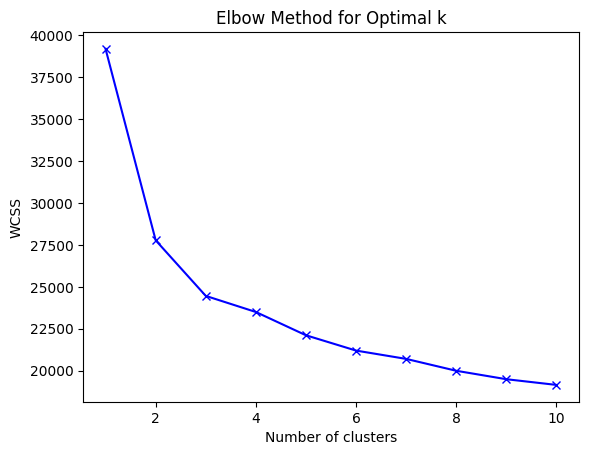

In [248]:
#calculating data for elbow method and showing it on a plot
wcss = [] #wcss is the sum of squared distances of samples to their closest cluster center
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

#ploting the Elbow Curve
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

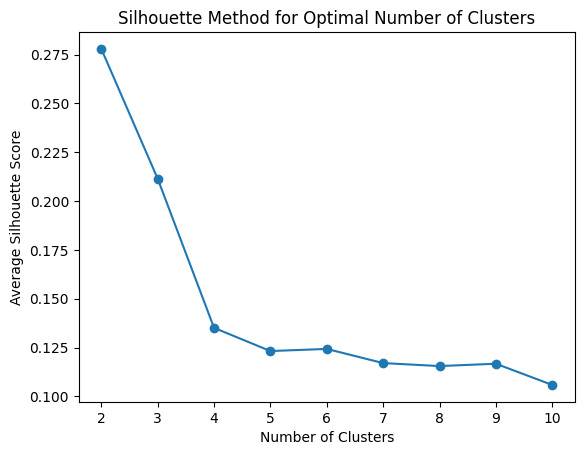

In [249]:
#range will show silhouette scores for different values of k, aim is to find the value of k that gives the highest silhouette score, i set range from 2 to 10
range_n_clusters = range(2, 11)
silhouette_avg_scores = []
data = df_scaled

#interating over the range and calculating the silhouette score for each value of k and appending it to the silhouette_avg_scores list
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=10) #creating the k-means model
    cluster_labels = kmeans.fit_predict(data) #fitting the model and predicting the clusters
    silhouette_avg = silhouette_score(data, cluster_labels) #calculating the silhouette score
    silhouette_avg_scores.append(silhouette_avg) #appending the silhouette score to the list

plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Method for Optimal Number of Clusters")
plt.show()

<b>Clustering Algorithm 2: K-Means Clustering (with Scaling) Conclusion</b><br>

Even though scaling can be a useful method when applying K-means algorithms, as it helps balance variance across different features, it did not work well in this case. The Silhouette score indicates a very low value, suggesting the results are poor, so I will not proceed further with this method.

<h3>Clustering algorithm 3: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)</h3>

<b>K-distance plot</b>

K-distance plot can be used to determine the eps number when using DBSCAN. The optimal number of eps is the point where the line starts to flatten after fast rise.

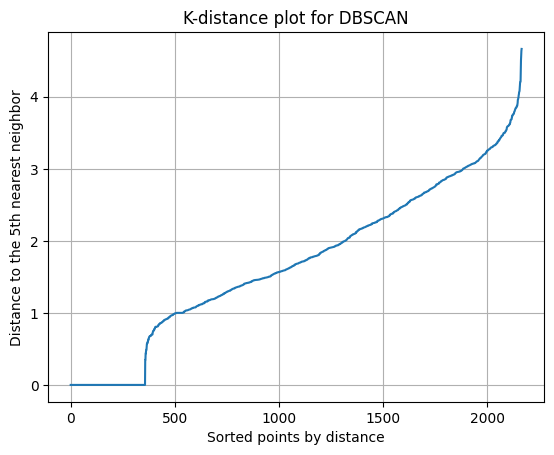

In [252]:
knn = NearestNeighbors(n_neighbors=5) # n_neighbors is number of neighbors that are considered
knn.fit(df_scaled) # fitting the model
distances, indices = knn.kneighbors(df_scaled) # calculating the distances and indices of the neighbors
distances = np.sort(distances, axis=0) # sorting the distances
distances = distances[:, 1]
plt.grid()
plt.plot(distances)
plt.xlabel('Sorted points by distance')
plt.ylabel('Distance to the 5th nearest neighbor')
plt.title('K-distance plot for DBSCAN')

plt.show()

As testing a model with values of 0,6 to 0,9 for eps did not give good results, a new approach will be used

Testing automatic cluster detection using DBSCAN and looping over different values of eps and min_samples in order to find the best parameters

In [255]:
#eps start parameter and list of test samples
eps = 2.5
test_samples = [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]
#loop over the test_samples and eps and calculating the number of clusters and noise points
while eps < 3.0:
    for t in test_samples:
        dbscan = DBSCAN(eps=eps, min_samples=m)
        dbscan.fit(df_scaled)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #calculating number clusters and noise points that are labeled as -1
        n_noise = list(labels).count(-1)
        if  n_noise < 800: #printing only the results with less than 800 noise points
            df['Cluster'] = labels #adding the cluster column to the dataframe
            df["Cluster"].unique() #geting unique values of the cluster column
            print (df["Cluster"].value_counts())
    eps += 0.01

Cluster
 0     1400
-1      687
 2       13
 5       10
 4        7
 10       7
 6        5
 3        4
 8        4
 1        3
 17       3
 7        3
 9        3
 11       3
 12       3
 16       3
 13       3
 14       3
 15       3
Name: count, dtype: int64
Cluster
 0     1400
-1      687
 2       13
 5       10
 4        7
 10       7
 6        5
 3        4
 8        4
 1        3
 17       3
 7        3
 9        3
 11       3
 12       3
 16       3
 13       3
 14       3
 15       3
Name: count, dtype: int64
Cluster
 0     1400
-1      687
 2       13
 5       10
 4        7
 10       7
 6        5
 3        4
 8        4
 1        3
 17       3
 7        3
 9        3
 11       3
 12       3
 16       3
 13       3
 14       3
 15       3
Name: count, dtype: int64
Cluster
 0     1400
-1      687
 2       13
 5       10
 4        7
 10       7
 6        5
 3        4
 8        4
 1        3
 17       3
 7        3
 9        3
 11       3
 12       3
 16       3
 13       3
 1

Continuing with almost the same algorithm, but tuning the eps and min_samples parameters in order to get the best results

In [297]:
dbscan = DBSCAN(eps=1.91, min_samples=2)
dbscan.fit(df_scaled)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f'Number of clusters: {n_clusters}, Number of noise points: {n_noise}')
df['Cluster'] = labels
df_scaled['Cluster'] = labels
df["Cluster"].unique()
cluster_counts = df["Cluster"].value_counts()
large_clusters = cluster_counts[cluster_counts > 50] #i am interested only in clusters with sufficient number of points (more than 50)
print (large_clusters)

Number of clusters: 138, Number of noise points: 913
Cluster
-1     913
 1     405
 0     286
 10    182
 2      83
Name: count, dtype: int64


In [298]:
#clusters that are too small will be labeled as -1
df.loc[~df["Cluster"].isin([0, 1, 2, 10]), "Cluster"] = -1

Cluster -1: 1211
Cluster 1: 405
Cluster 0: 286
Cluster 10: 182
Cluster 2: 83


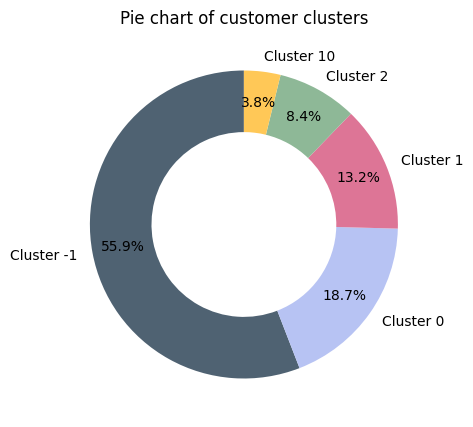

In [299]:
#print number of customers in each cluster  and plot a pie chart
for cluster, count in df['Cluster'].value_counts().items():
    print(f"Cluster {cluster}: {count}")

#getting labels of the clusters
unique_clusters = df['Cluster'].unique()
labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.figure(figsize=(5, 5))
plt.pie(df['Cluster'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.8)   
plt.title("Pie chart of customer clusters")
plt.show()

In [300]:
#dbscan cluster centers 
cluster_centers = pd.DataFrame()
numeric_columns = df.select_dtypes(include=[np.number]).columns

for cluster in unique_clusters:
    cluster_centers[cluster] = df[df['Cluster'] == cluster][numeric_columns].mean()
cluster_centers = cluster_centers.T

print(cluster_centers)

              ID  Year_of_birth        Income  Kids_at_home  Teens_at_home  \
-1   5587.712634    1967.316268  63877.089182      0.202312       0.505367   
 0   5503.713287    1965.300699  39351.597902      1.034965       1.000000   
 1   5653.419753    1978.449383  29178.681481      1.000000       0.000000   
 2   5545.180723    1973.240964  24888.626506      0.000000       0.000000   
 10  5676.082418    1962.285714  47512.060440      0.000000       1.000000   

     Last_purchase  Amount_wines  Amount_fruits  Amount_meat  Amount_fish  \
-1       50.224608    502.153592      44.051197   276.943848    62.586292   
 0       49.828671     48.912587       2.776224    19.748252     4.080420   
 1       48.982716     23.234568       4.837037    20.449383     6.980247   
 2       45.602410     18.855422       7.867470    18.421687    10.409639   
 10      45.439560    140.478022       5.642857    38.500000     8.269231   

     Amount_sweets  Amount_gold  Discount_purchases  Web_purchases  

In [301]:
print(df['Cluster'].value_counts())

Cluster
-1     1211
 1      405
 0      286
 10     182
 2       83
Name: count, dtype: int64


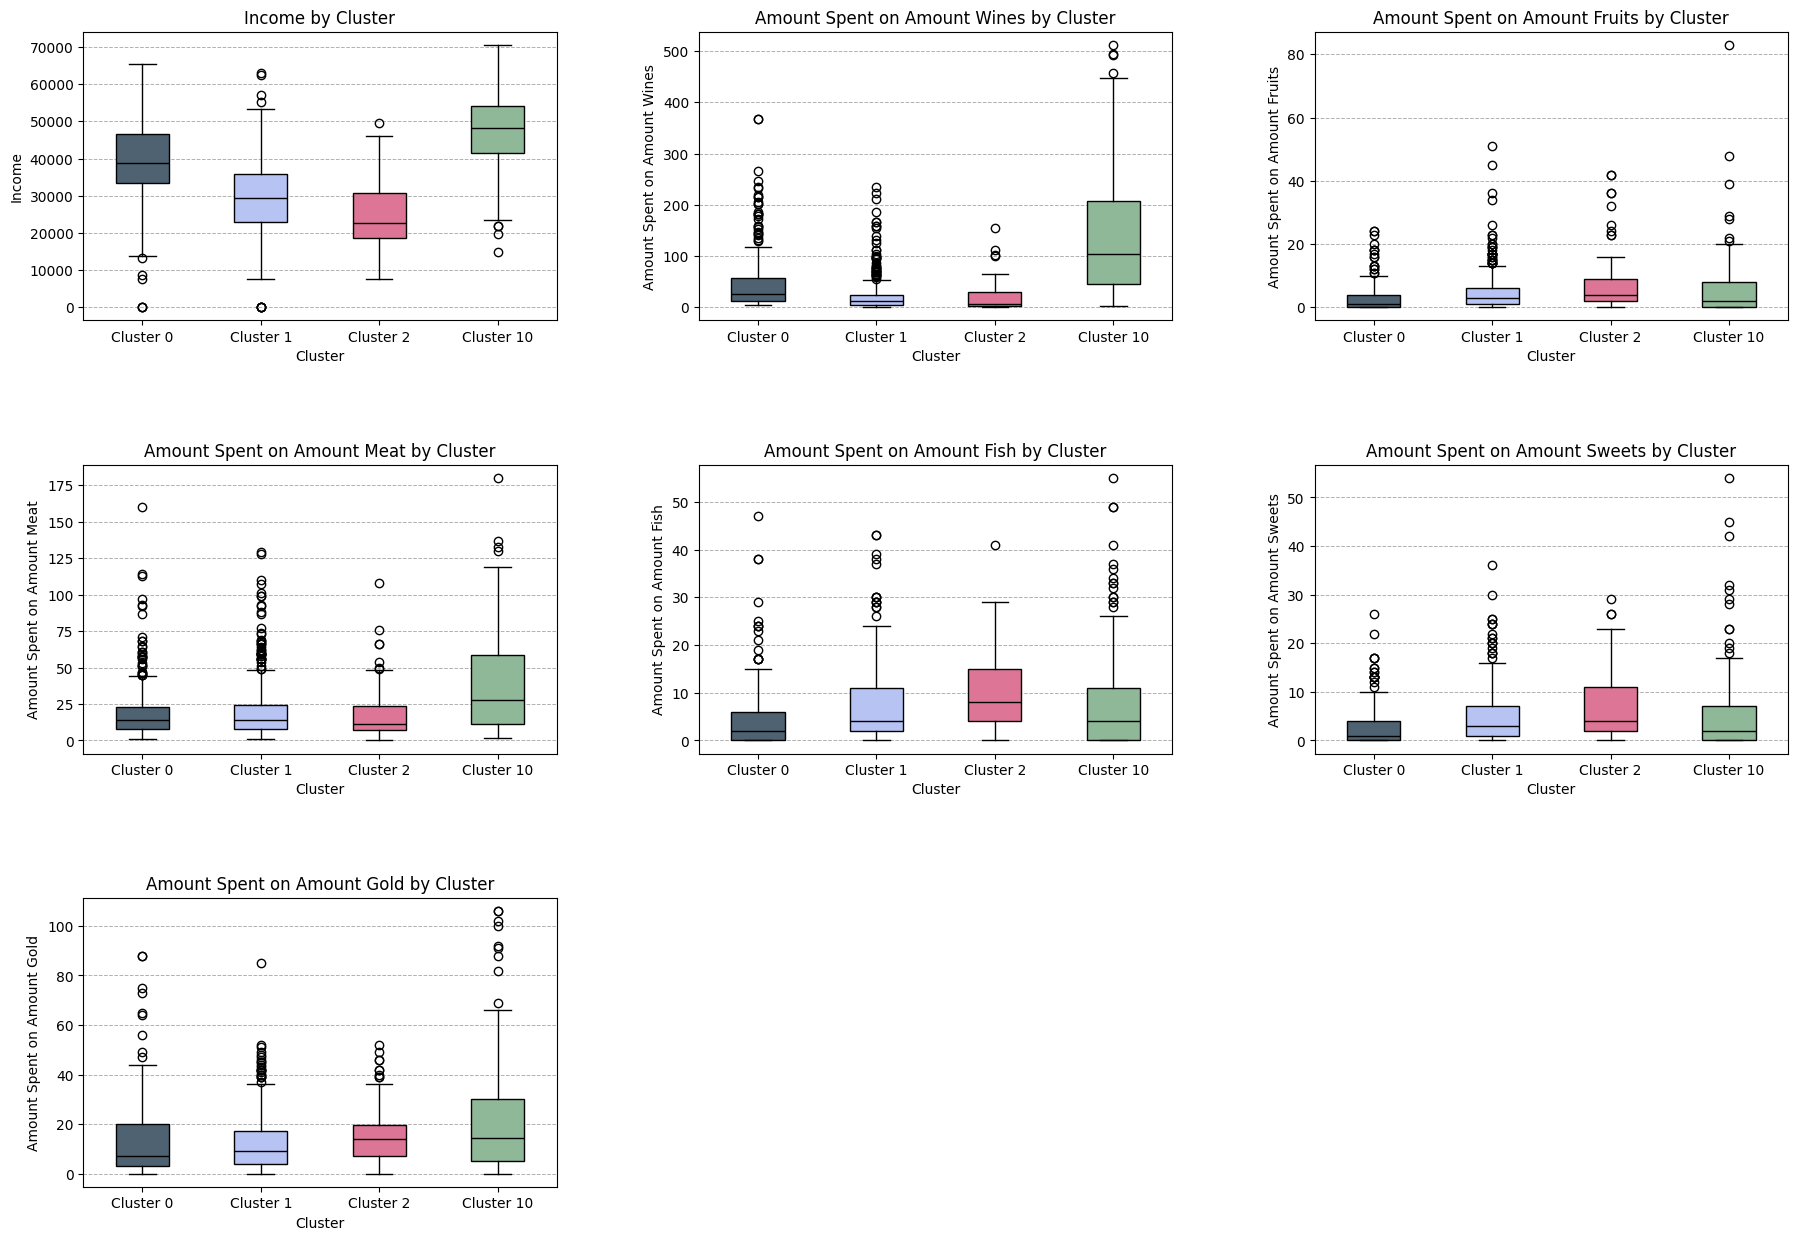

In [303]:
#colors that will be used in plots
my_colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FFC857', '#119DA4', '#19647E', '#FF6F61', '#6A0572']

#creating aplot with subpqplots
figure, axs = plt.subplots(3, 3, figsize=(22, 15))
axs = axs.flatten()
for ax in axs:
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7) #adding grid



#first plot will be a boxplot of income by cluster
box = axs[0].boxplot([df[df['Cluster'] == 0]['Income'],
                      df[df['Cluster'] == 1]['Income'],
                      df[df['Cluster'] == 2]['Income'],
                      df[df['Cluster'] == 10]['Income']],
                      patch_artist=True, medianprops=dict(color='black'))
axs[0].set_title("Income by Cluster")
axs[0].set_xlabel("Cluster")
axs[0].set_ylabel("Income")
axs[0].set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 10'])
for patch, color in zip(box['boxes'], my_colors):
    patch.set_facecolor(color)

#other will be plots for spending on different product groups by cluster and it will be done automatically
for i, feature in enumerate(['Amount_wines', 'Amount_fruits', 'Amount_meat', 
                             'Amount_fish', 'Amount_sweets', 'Amount_gold'], start=1):
    box = axs[i].boxplot([df[df['Cluster'] == 0][feature],
                          df[df['Cluster'] == 1][feature],
                          df[df['Cluster'] == 2][feature],
                          df[df['Cluster'] == 10][feature]],
                          patch_artist=True, medianprops=dict(color='black'))
    axs[i].set_title(f"Amount Spent on {feature.replace('_', ' ').title()} by Cluster")
    axs[i].set_xlabel("Cluster")
    axs[i].set_ylabel(f"Amount Spent on {feature.replace('_', ' ').title()}")
    axs[i].set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 10'])
    for patch, color in zip(box['boxes'], my_colors):
        patch.set_facecolor(color)

#removing "empty" subplots
axs[7].axis('off')
axs[8].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

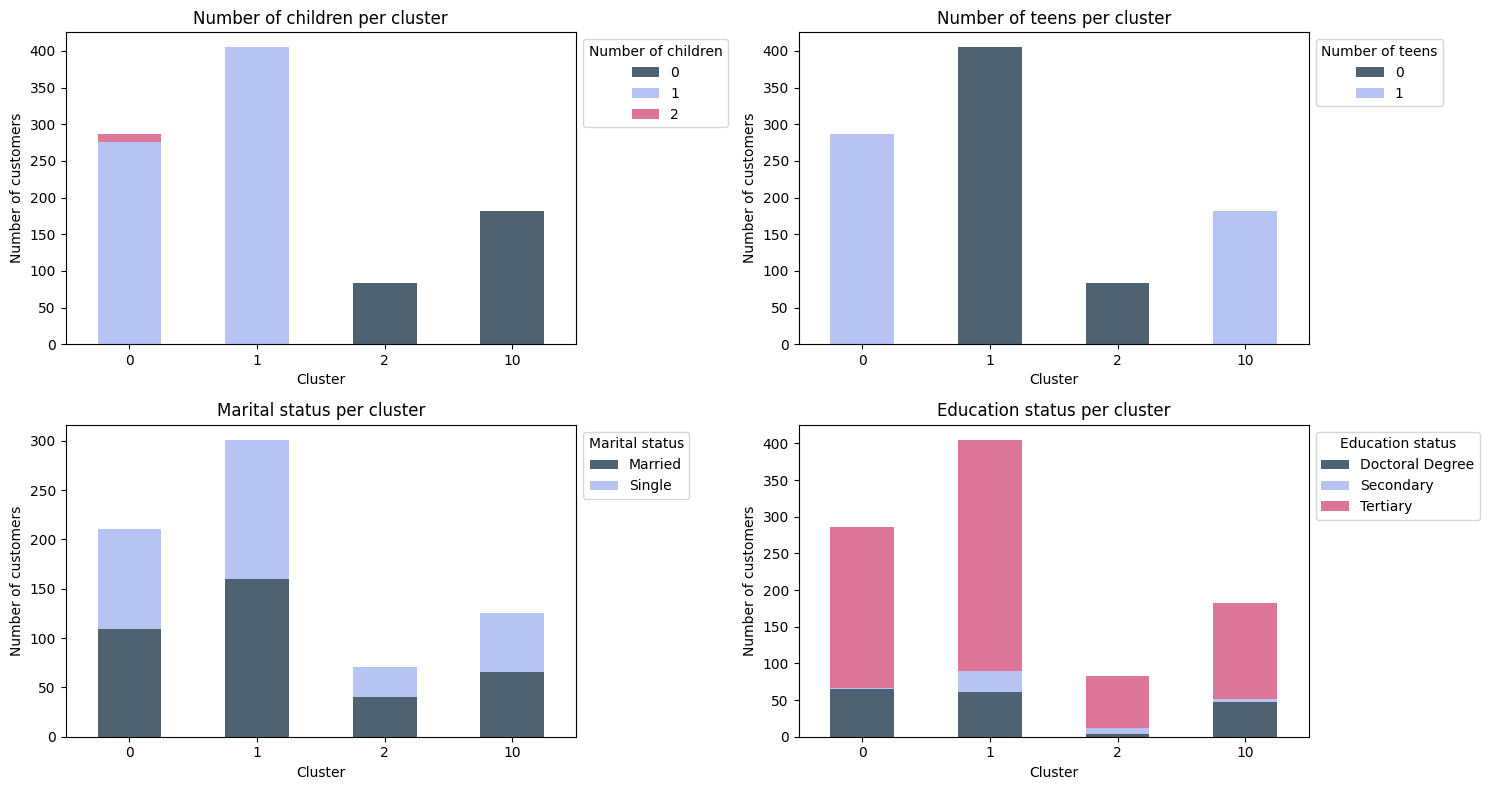

In [330]:
# Exclude cluster -1
df_filtered = df[df['Cluster'] != -1]

# Your colors for the plots
my_colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FFC857', '#119DA4', '#19647E', '#FF6F61', '#6A0572']

# Creating a 2x2 plot
figure, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.flatten()

# First plot: number of children per cluster
children_at_home = df_filtered[df_filtered['Kids_at_home'].isin([0, 1, 2, 3])].groupby(['Cluster', 'Kids_at_home']).size().unstack()
# Plotting the bar plot
children_at_home.plot(kind='bar', stacked=True, color=my_colors[:len(children_at_home.columns)], ax=axs[0])
axs[0].set_title("Number of children per cluster")
axs[0].set_xlabel("Cluster")
axs[0].set_ylabel("Number of customers")
axs[0].xaxis.set_tick_params(rotation=0)
axs[0].legend(title="Number of children", bbox_to_anchor=(1.0, 1), loc='upper left')

# Second plot: number of teens per cluster
teens_at_home = df_filtered[df_filtered['Teens_at_home'].isin([0, 1, 2, 3])].groupby(['Cluster', 'Teens_at_home']).size().unstack()
teens_at_home.plot(kind='bar', stacked=True, color=my_colors[:len(teens_at_home.columns)], ax=axs[1])
axs[1].set_title("Number of teens per cluster")
axs[1].set_xlabel("Cluster")
axs[1].set_ylabel("Number of customers")
axs[1].xaxis.set_tick_params(rotation=0)
axs[1].legend(title="Number of teens", bbox_to_anchor=(1.0, 1), loc='upper left')

# Third plot: marital status per cluster
marital_status = df_filtered[df_filtered['Marital_Status'].isin(['Single', 'Together', 'Married', 'Divorced', 'Widow'])].groupby(['Cluster', 'Marital_Status']).size().unstack()
marital_status.plot(kind='bar', stacked=True, color=my_colors[:len(marital_status.columns)], ax=axs[2])
axs[2].set_title("Marital status per cluster")
axs[2].set_xlabel("Cluster")
axs[2].set_ylabel("Number of customers")
axs[2].xaxis.set_tick_params(rotation=0)
axs[2].legend(title="Marital status", bbox_to_anchor=(1.0, 1), loc='upper left')

# Fourth plot: education status per cluster
education_status = df_filtered[df_filtered['Education'].isin(['Secondary', 'Tertiary', 'Doctoral Degree'])].groupby(['Cluster', 'Education']).size().unstack()
education_status.plot(kind='bar', stacked=True, color=my_colors[:len(education_status.columns)], ax=axs[3])
axs[3].set_title("Education status per cluster")
axs[3].set_xlabel("Cluster")
axs[3].set_ylabel("Number of customers")
axs[3].xaxis.set_tick_params(rotation=0)
axs[3].legend(title="Education status", bbox_to_anchor=(1.0, 1), loc='upper left')

plt.tight_layout()
plt.show()


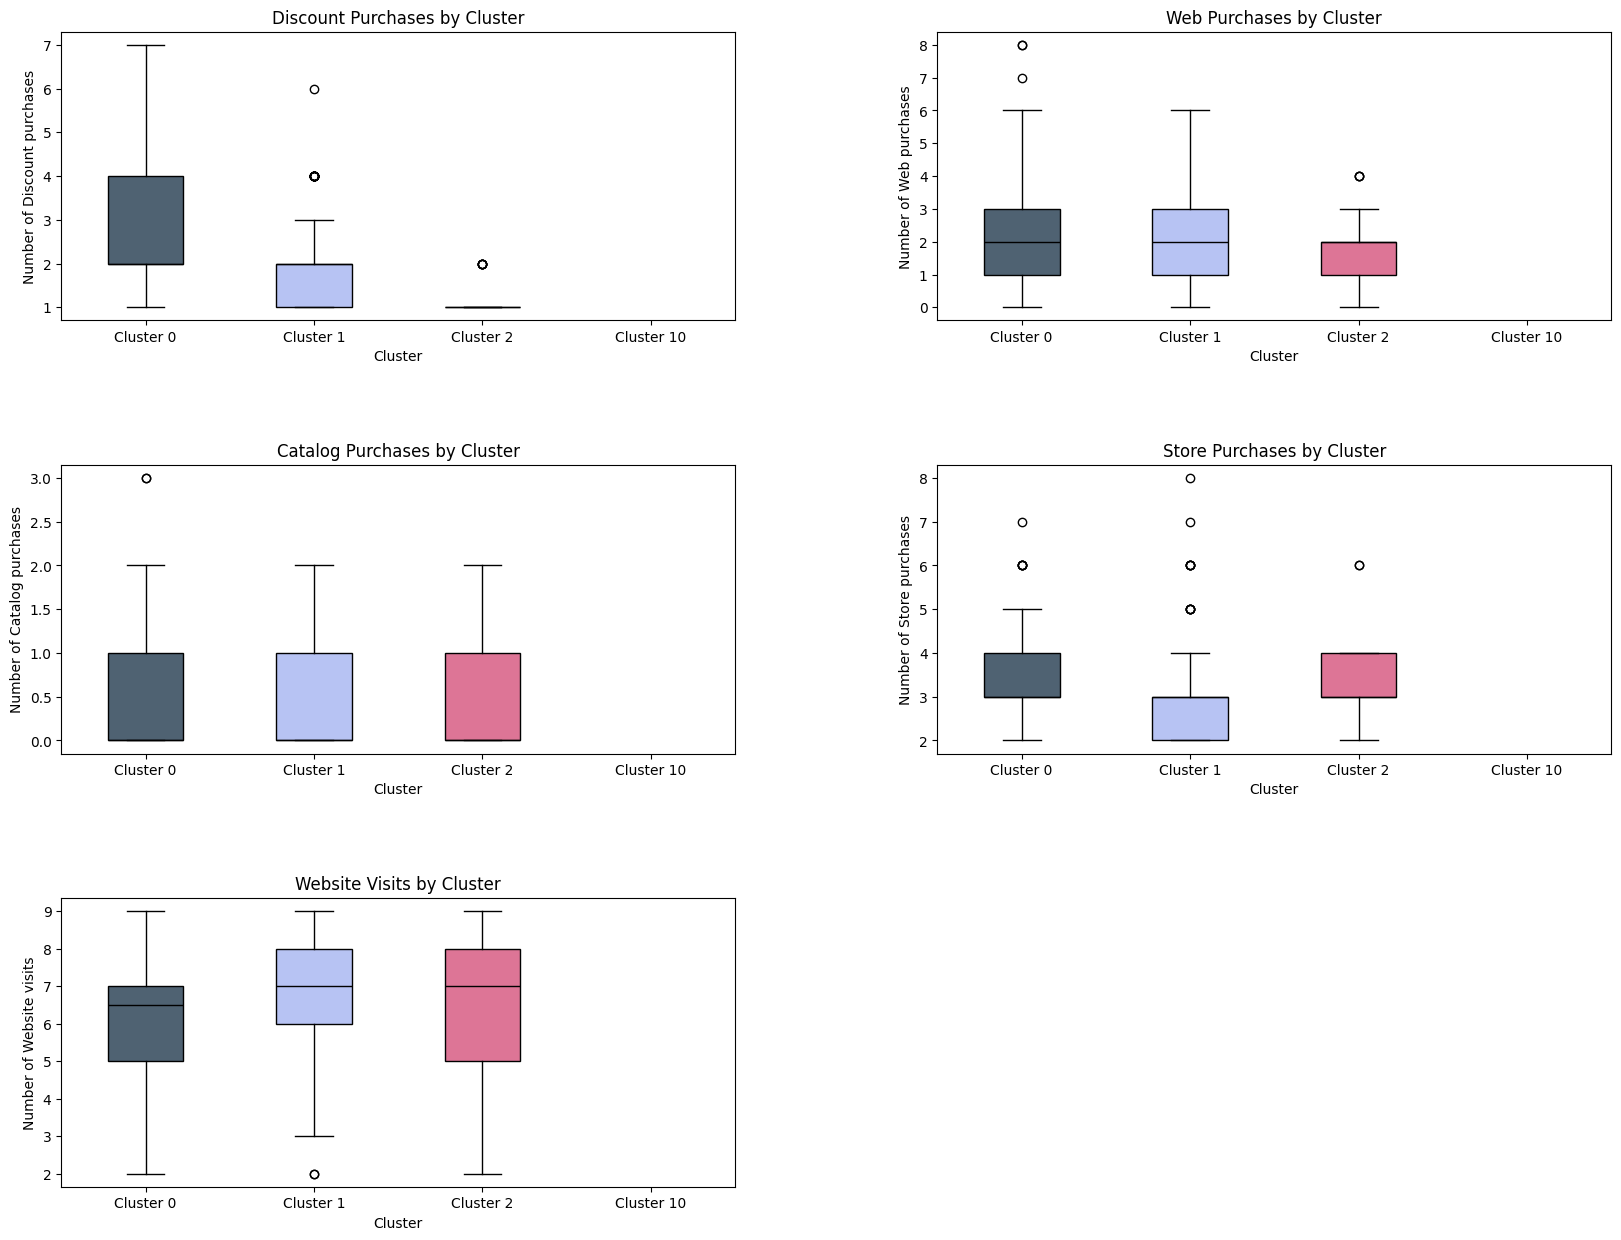

In [309]:
#specifying colors, columns and titles for the plots
my_colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FFC857', '#119DA4', '#19647E', '#FF6F61', '#6A0572']
features = ['Discount_purchases', 'Web_purchases', 'Catalog_purchases', 'Store_purchases', 'Website_visits']
titles = ["Discount Purchases by Cluster", "Web Purchases by Cluster", "Catalog Purchases by Cluster", "Store Purchases by Cluster", "Website Visits by Cluster"]
#creating a 3X2 plot
figure, axs = plt.subplots(3, 2, figsize=(20, 15))
axs = axs.flatten()
#iterating over the features and plotting the boxplot for each feature
for i, feature in enumerate(features):
    box = axs[i].boxplot([df[df['Cluster'] == cluster][feature] for cluster in range(4)],
                         patch_artist=True, medianprops=dict(color='black'))
    axs[i].set_title(titles[i])
    axs[i].set_xlabel("Cluster")
    axs[i].set_ylabel(f"Number of {feature.replace('_', ' ').capitalize()}")
    axs[i].set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 10'])
    
    #setting colors for the boxes
    for patch, color in zip(box['boxes'], my_colors):
        patch.set_facecolor(color)

#last plot will be hidden
axs[5].axis('off')
#adding space between the plots
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

C:\Users\dalib\AppData\Local\Temp\ipykernel_15904\3753360393.py:7: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x='Income', y='Amount_meat', data=df[df['Cluster'] != -1], hue='Cluster', palette=my_colors, ax=axs[0])
C:\Users\dalib\AppData\Local\Temp\ipykernel_15904\3753360393.py:12: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x='Income', y='Amount_fish', data=df[df['Cluster'] != -1], hue='Cluster', palette=my_colors, ax=axs[1])
C:\Users\dalib\AppData\Local\Temp\ipykernel_15904\3753360393.py:18: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x='Income', y='Amount_sweets', data=df[df['Cluster'] != -1], hue='Cluster', palette=my_colors, ax=axs[2])


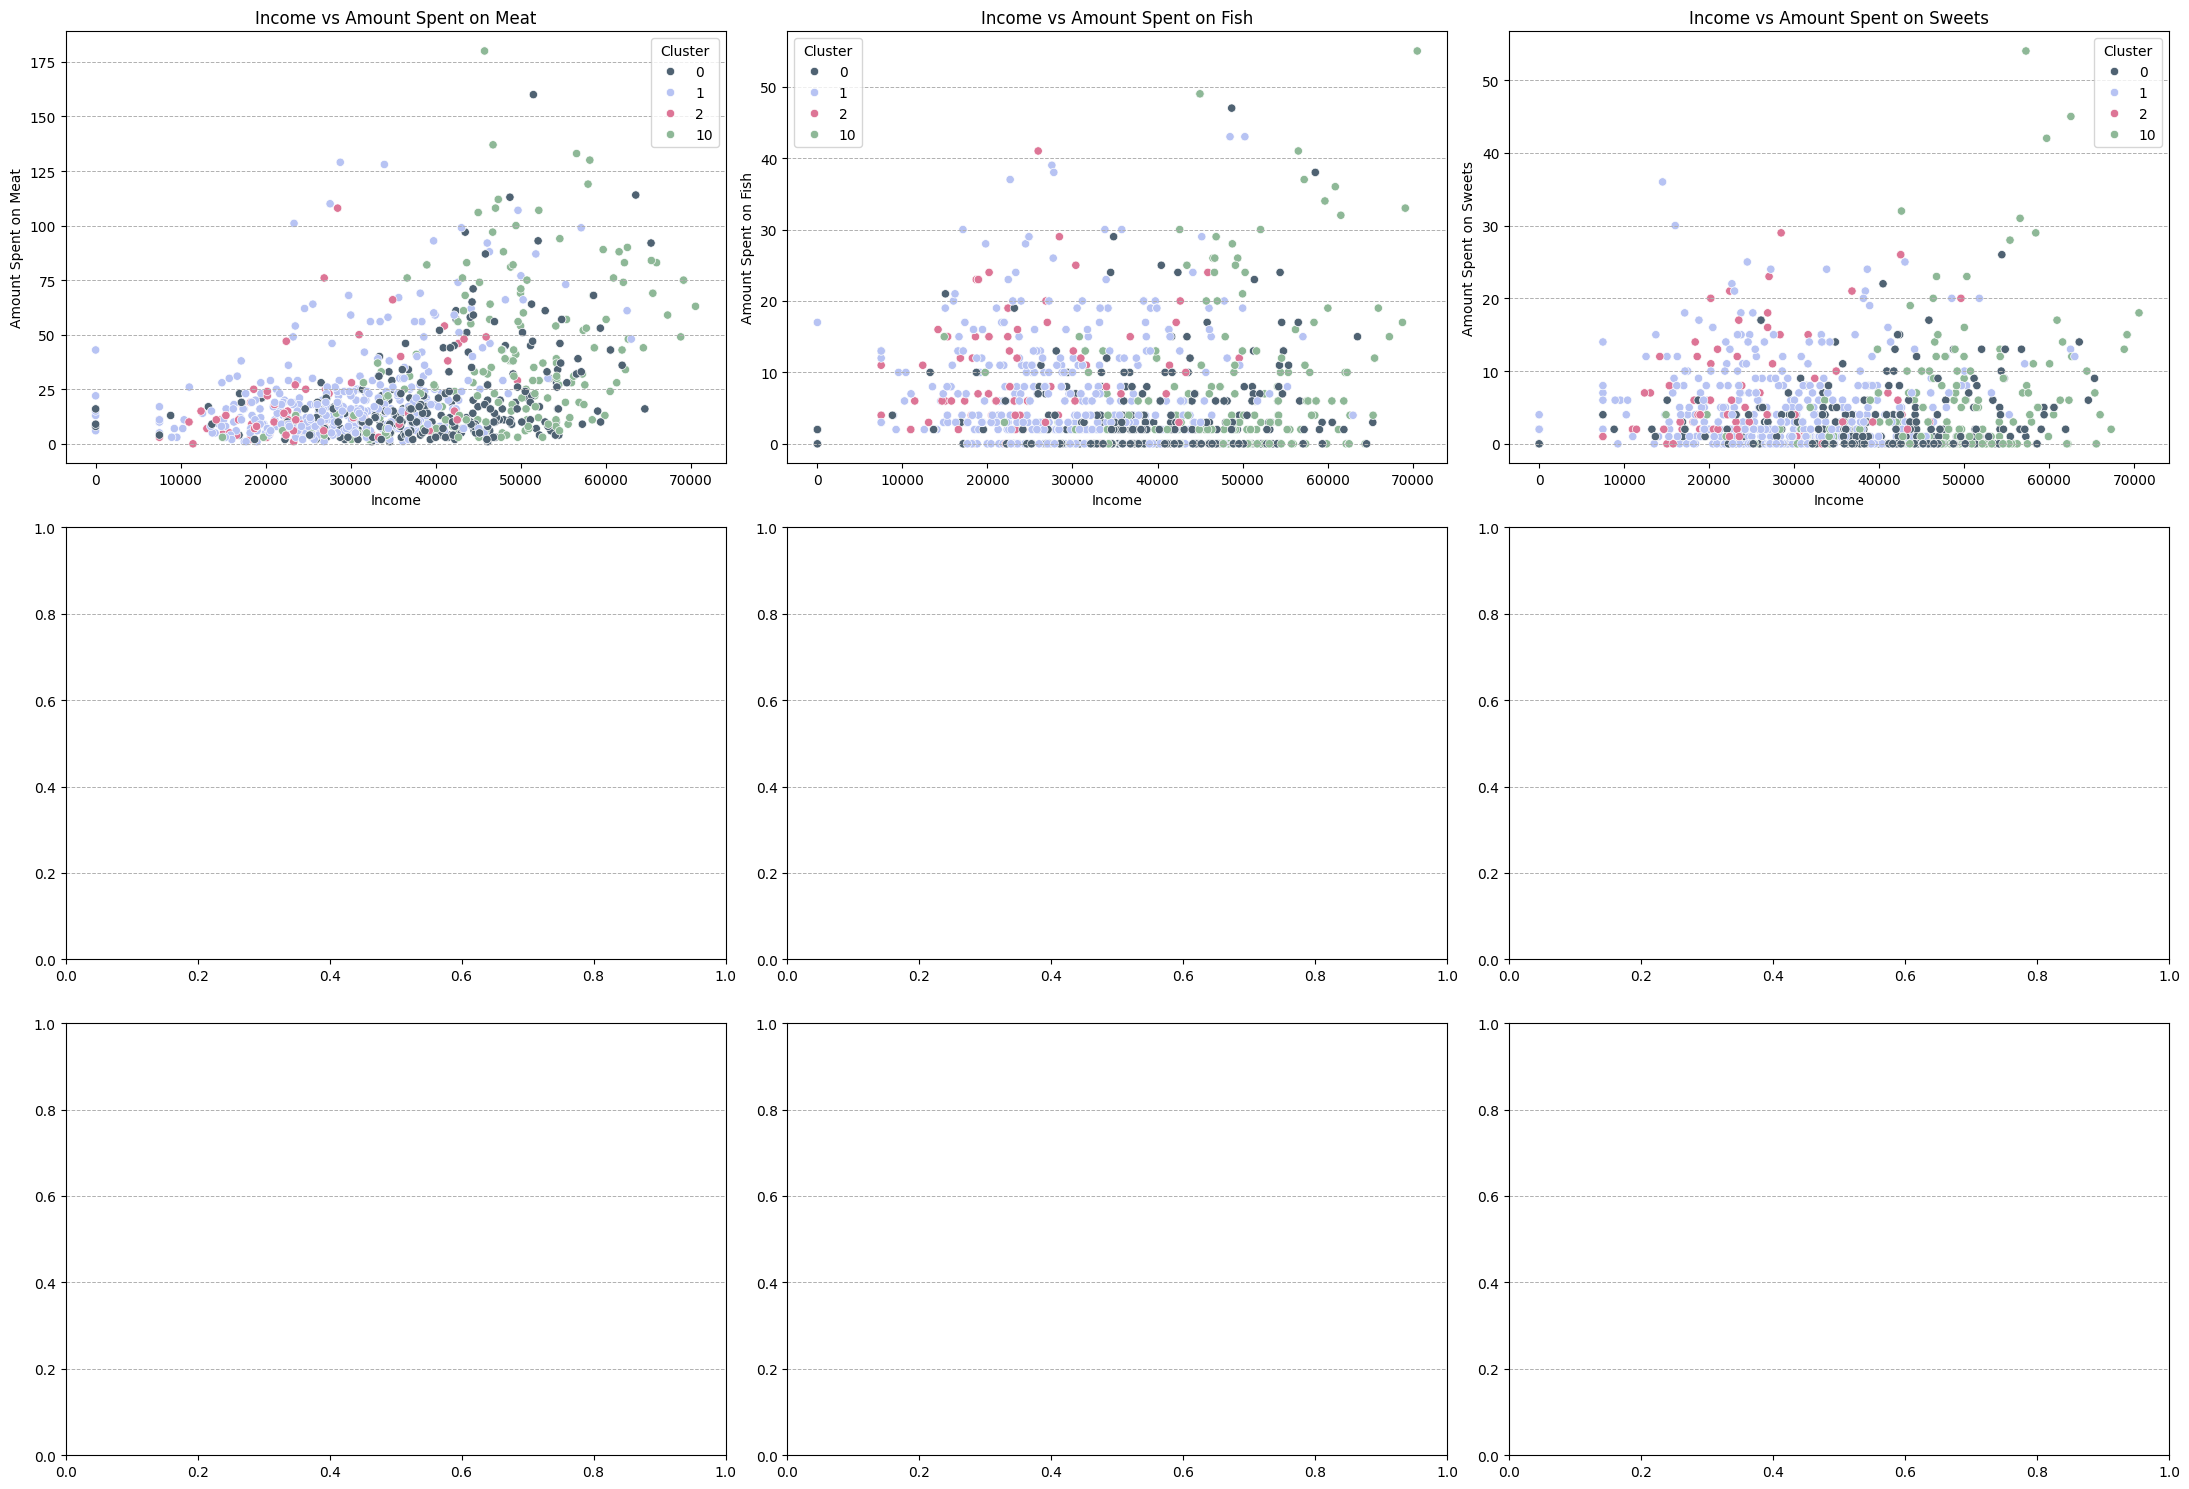

In [331]:
#creating aplot with subpqplots
figure, axs = plt.subplots(3, 3, figsize=(22, 15))
axs = axs.flatten()
for ax in axs:
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7) #adding grid

sns.scatterplot(x='Income', y='Amount_meat', data=df[df['Cluster'] != -1], hue='Cluster', palette=my_colors, ax=axs[0])
axs[0].set_title('Income vs Amount Spent on Meat')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Amount Spent on Meat')

sns.scatterplot(x='Income', y='Amount_fish', data=df[df['Cluster'] != -1], hue='Cluster', palette=my_colors, ax=axs[1])
axs[1].set_title('Income vs Amount Spent on Fish')
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Amount Spent on Fish')


sns.scatterplot(x='Income', y='Amount_sweets', data=df[df['Cluster'] != -1], hue='Cluster', palette=my_colors, ax=axs[2])
axs[2].set_title('Income vs Amount Spent on Sweets')
axs[2].set_xlabel('Income')
axs[2].set_ylabel('Amount Spent on Sweets')


plt.tight_layout()
plt.show()